# Perform Principal component analysis and perform clustering using first 

3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
wine=pd.read_csv(r"E:\assignments csv  files\wine.csv")

In [3]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine['Type'].unique()

array([1, 2, 3], dtype=int64)

In [6]:
# We need to find out by our analysis how many no.s of clusters are present. But 'Type' column already indicates that there are 3 clusters of wines. So we drop 'Type' column so that it will not interfere in our analysis.

In [7]:
wine=wine.drop('Type',axis=1)
wine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
wine.shape


(178, 13)

In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [10]:
wine.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [11]:
wine.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [12]:
wine.isnull().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [13]:
wine.duplicated().sum()

0

In [15]:
 # data visualization 
# plotting histogram to see distribution & plotting boxplot for outlier Detection

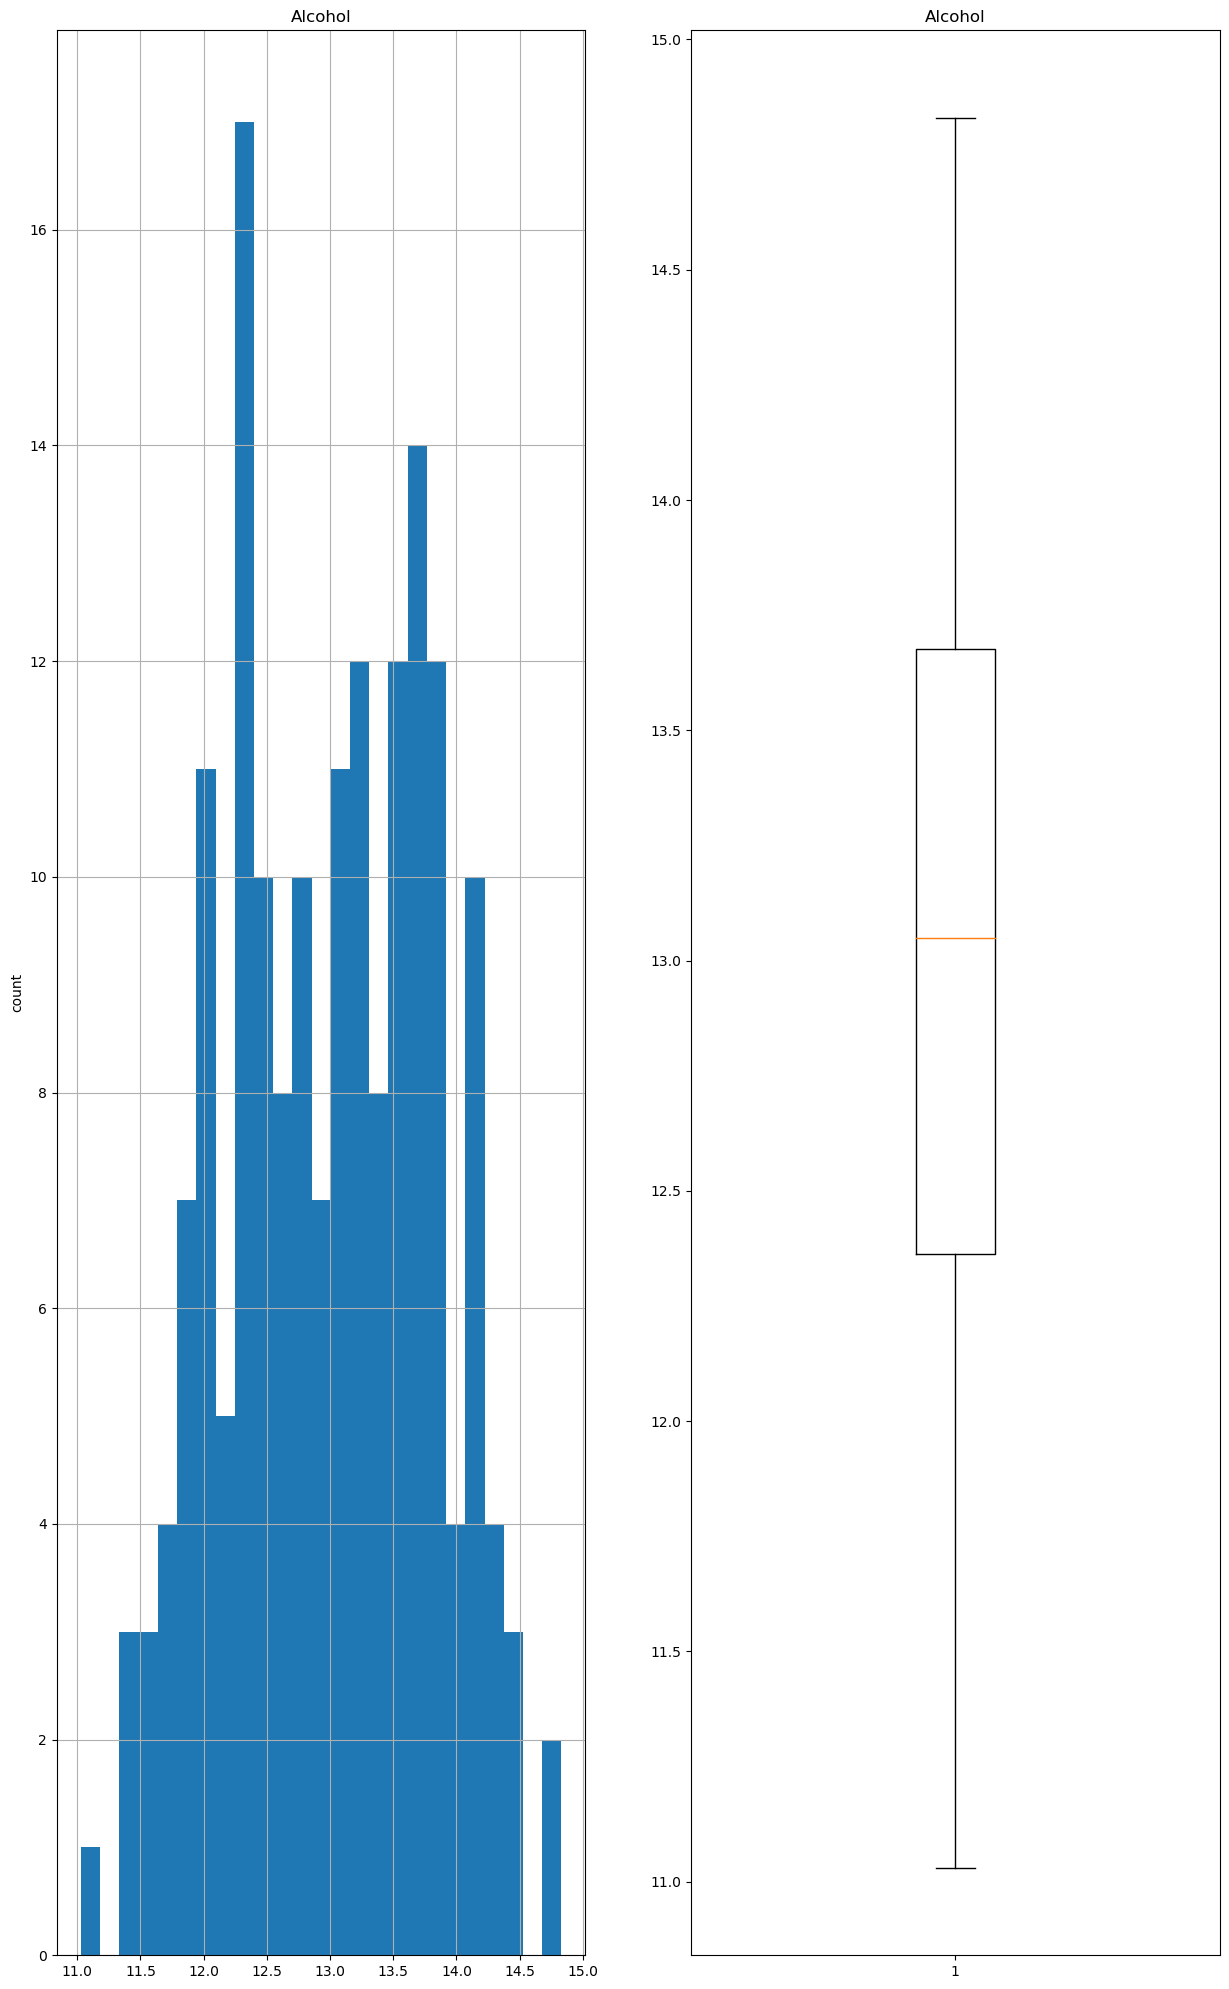

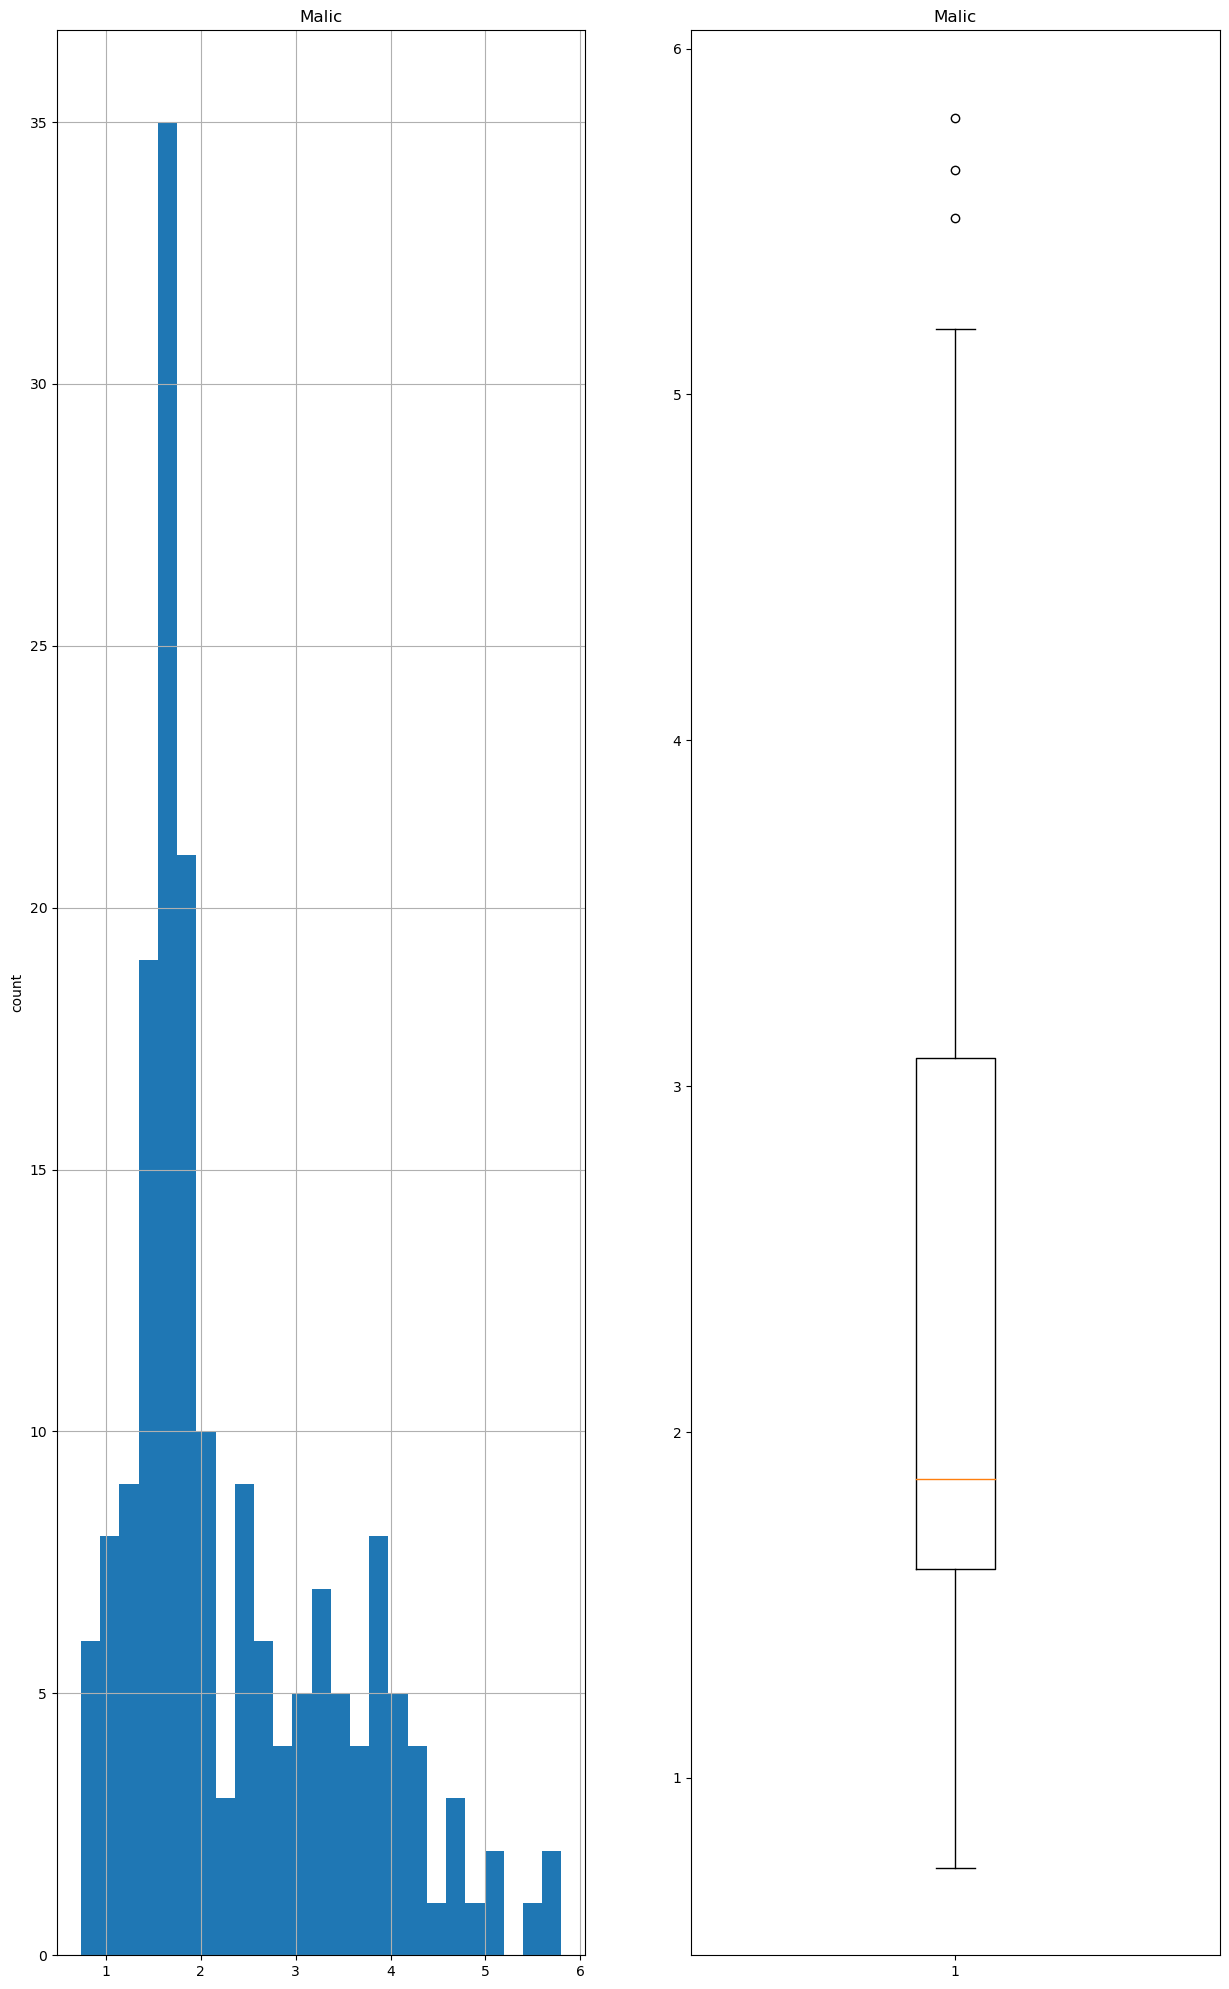

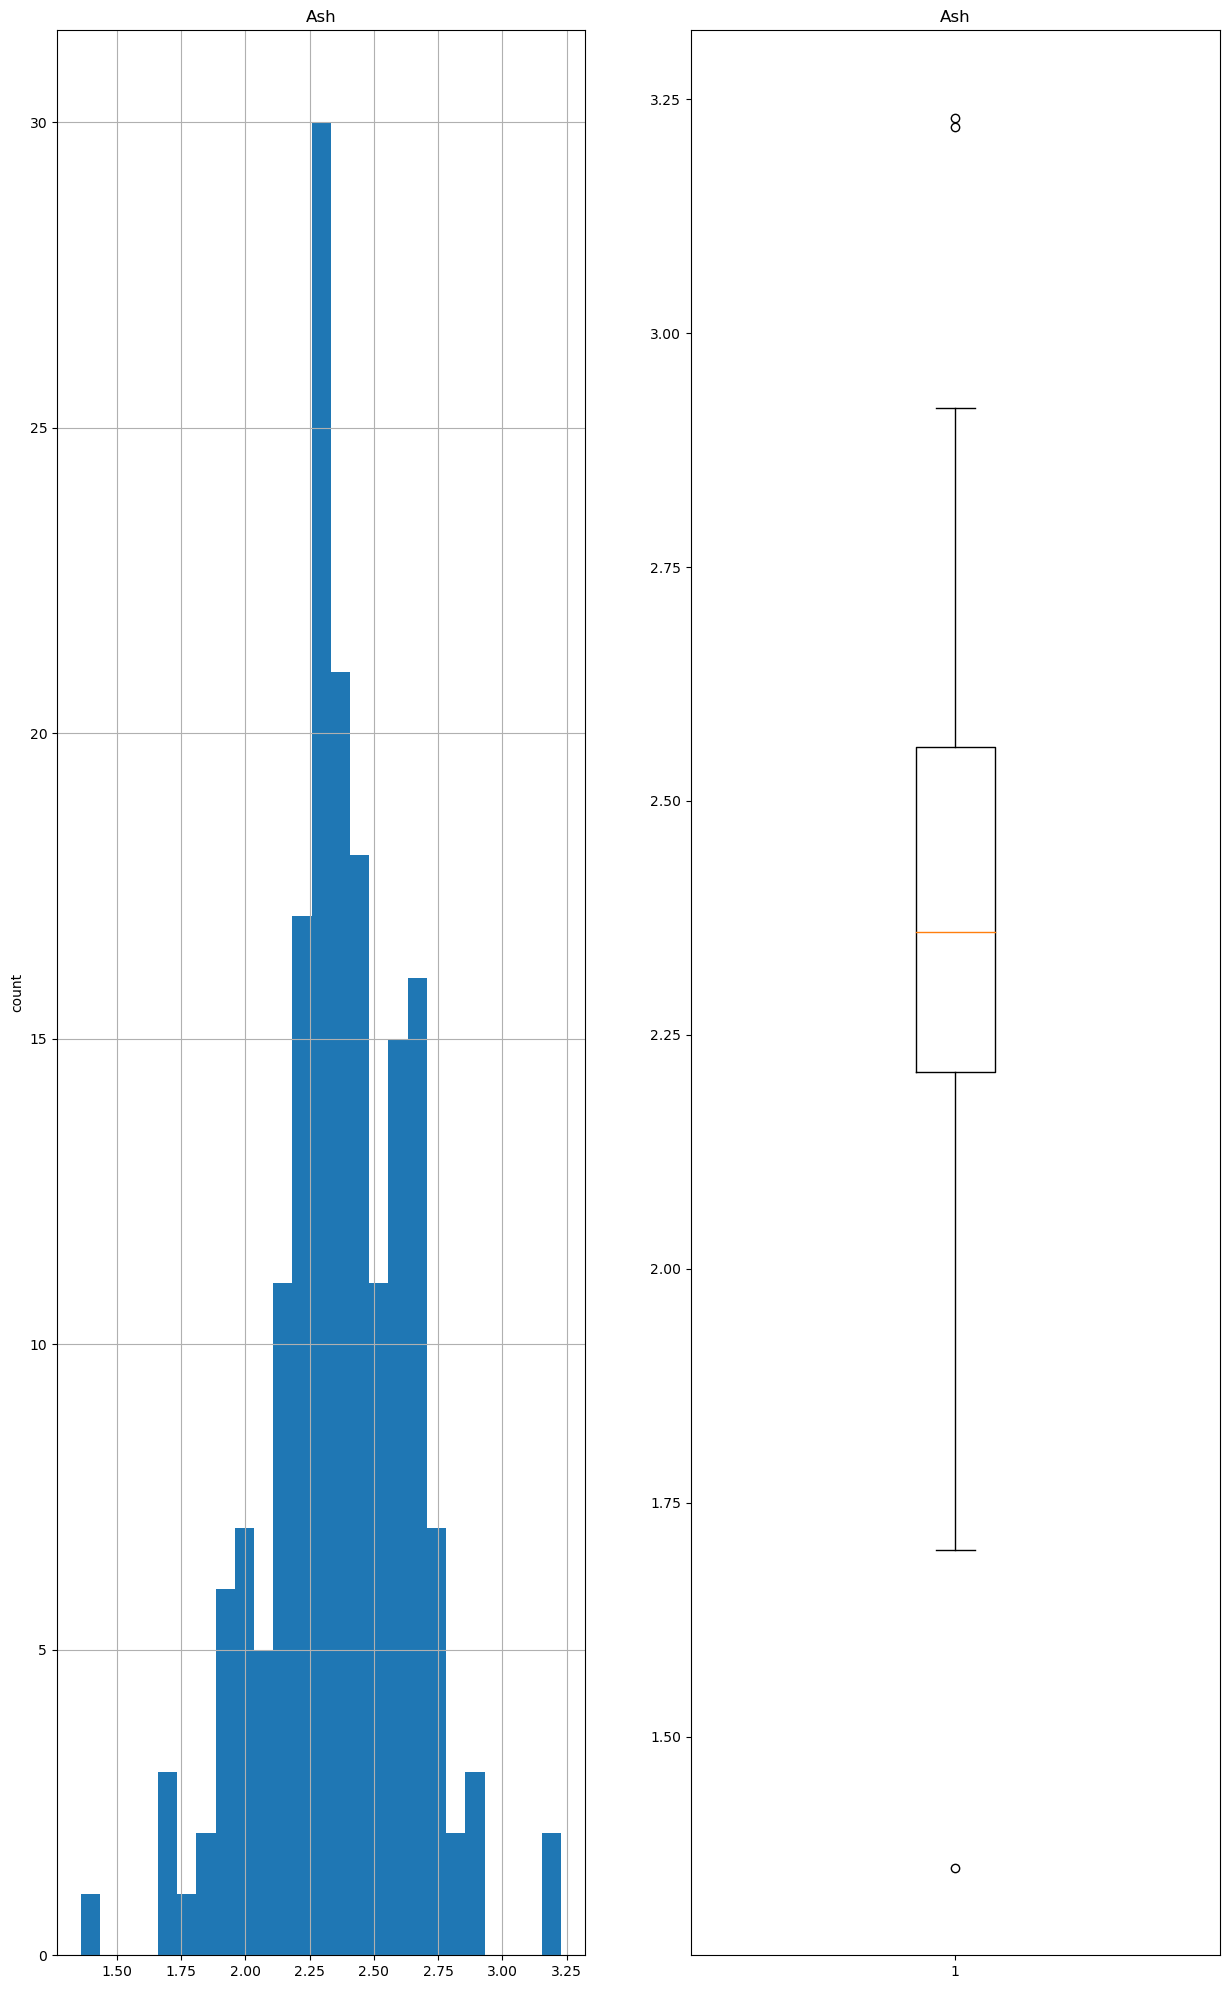

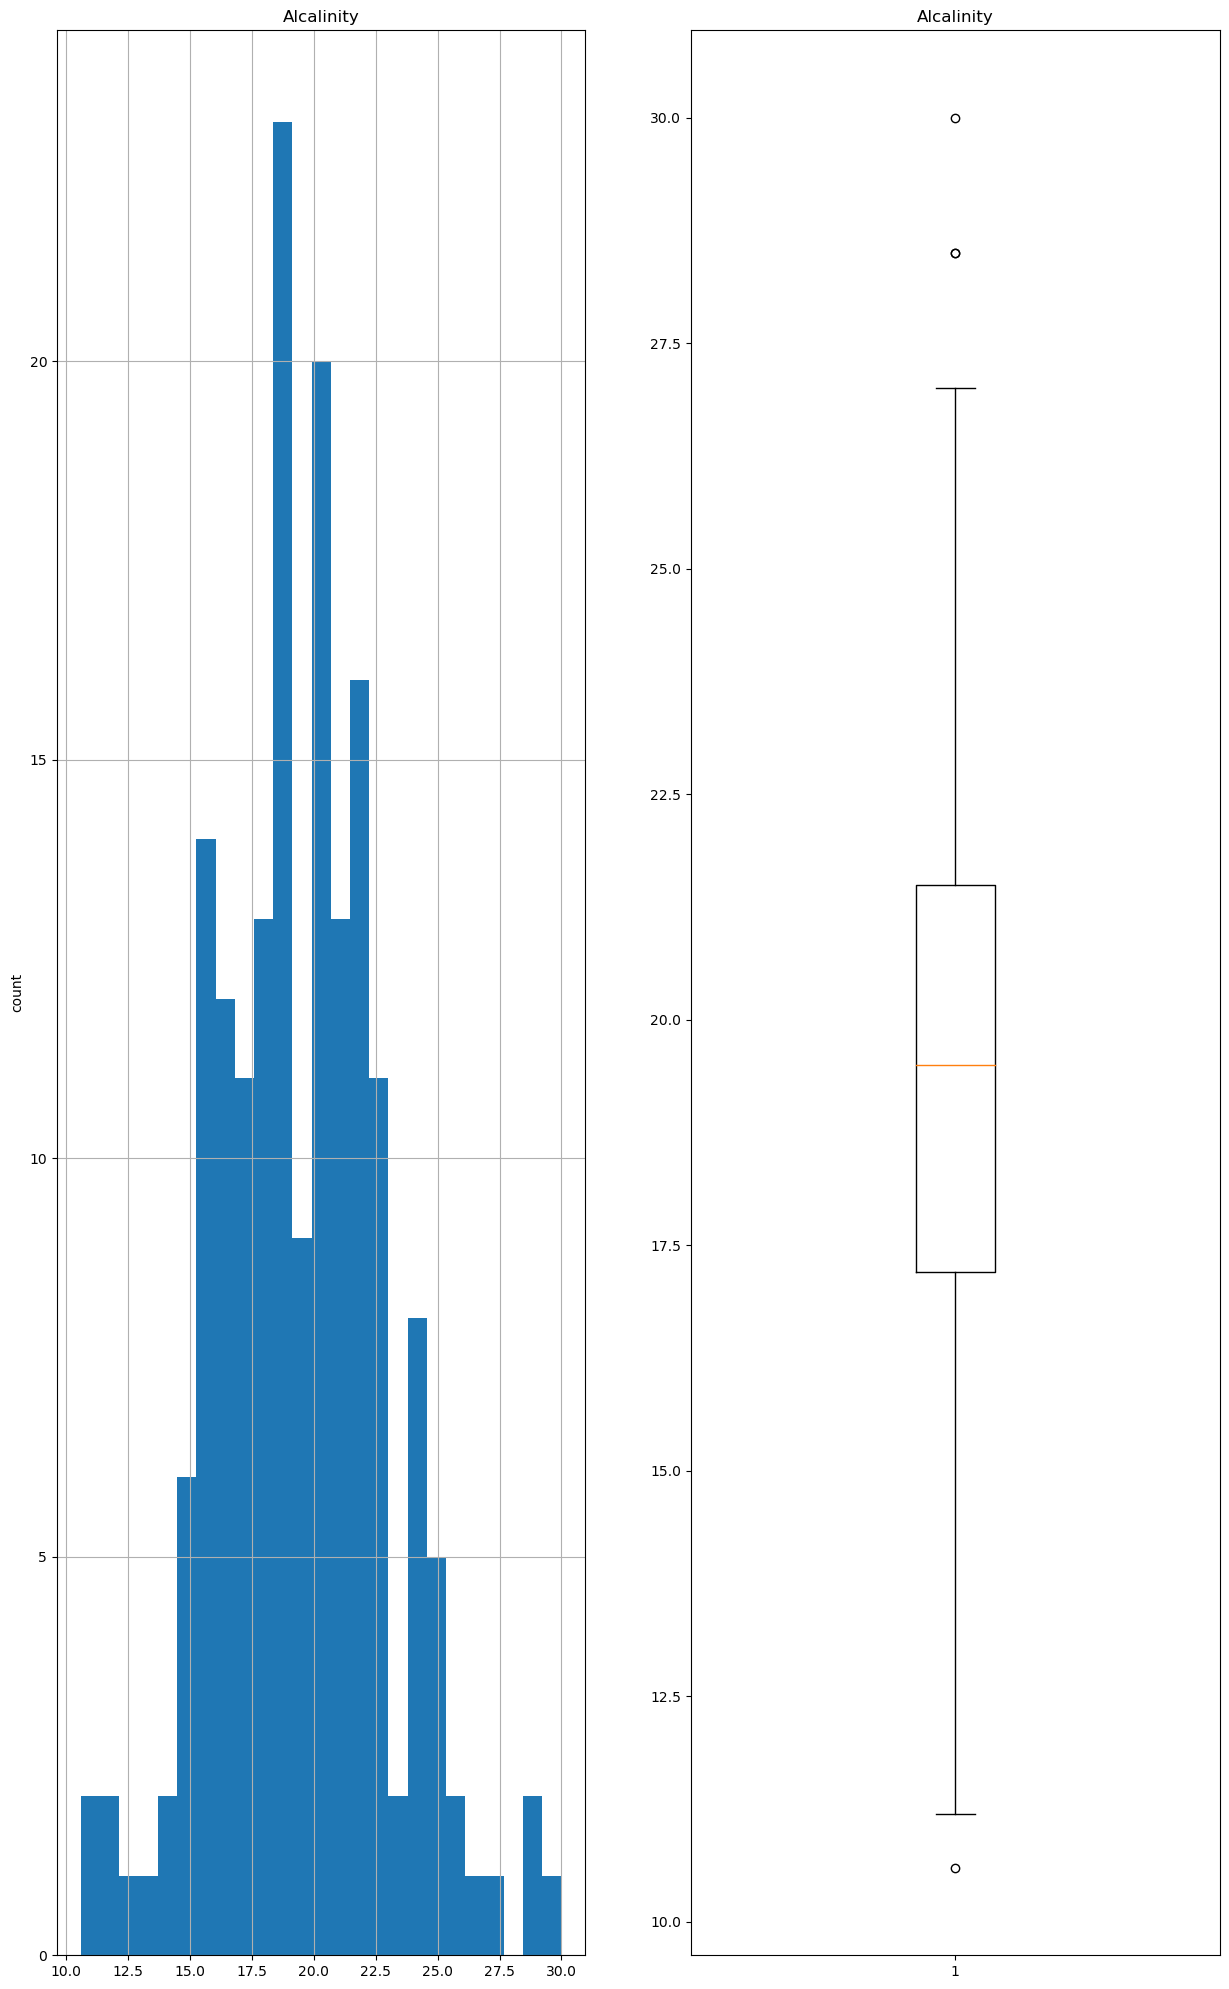

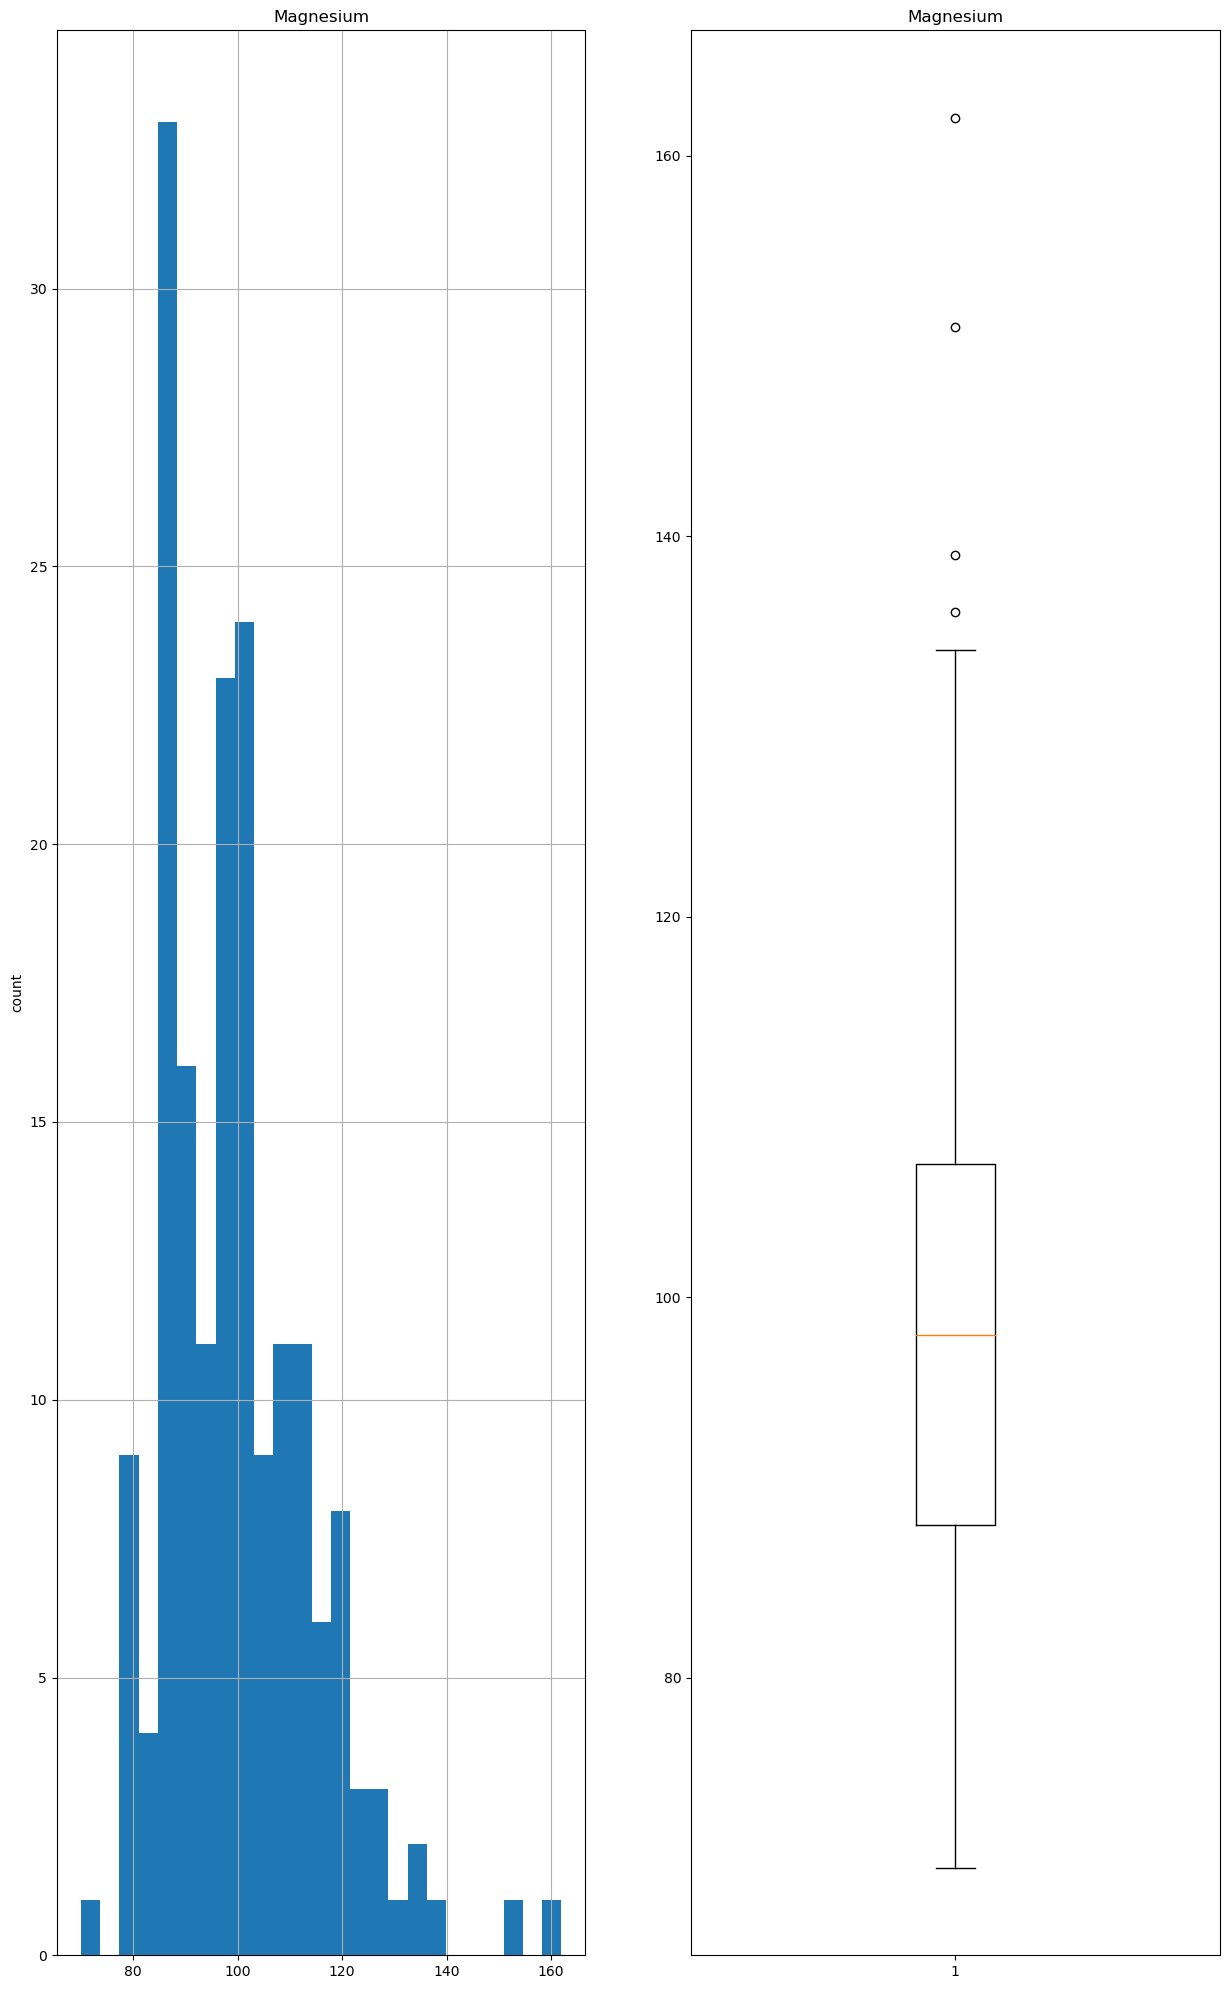

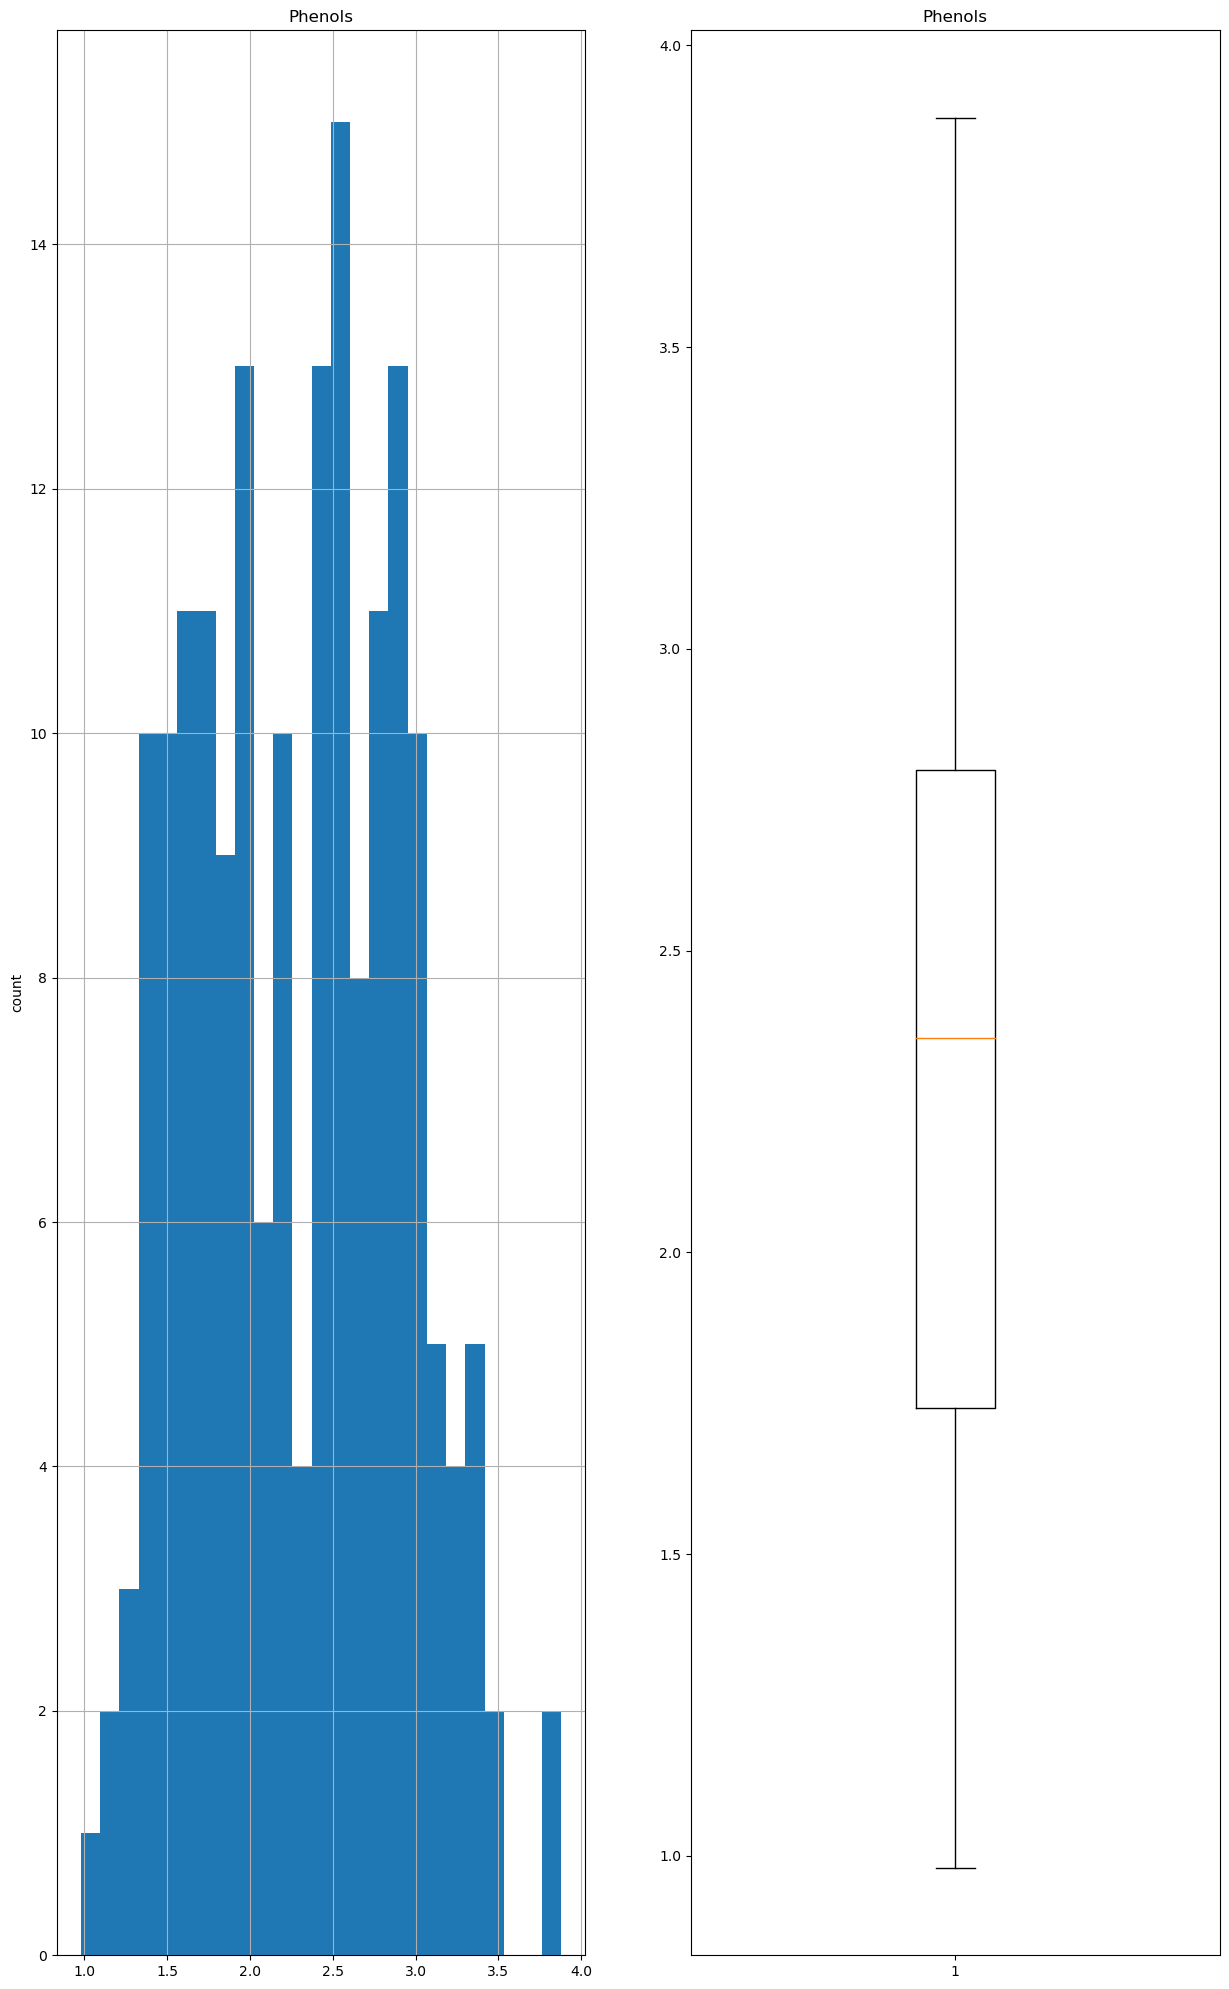

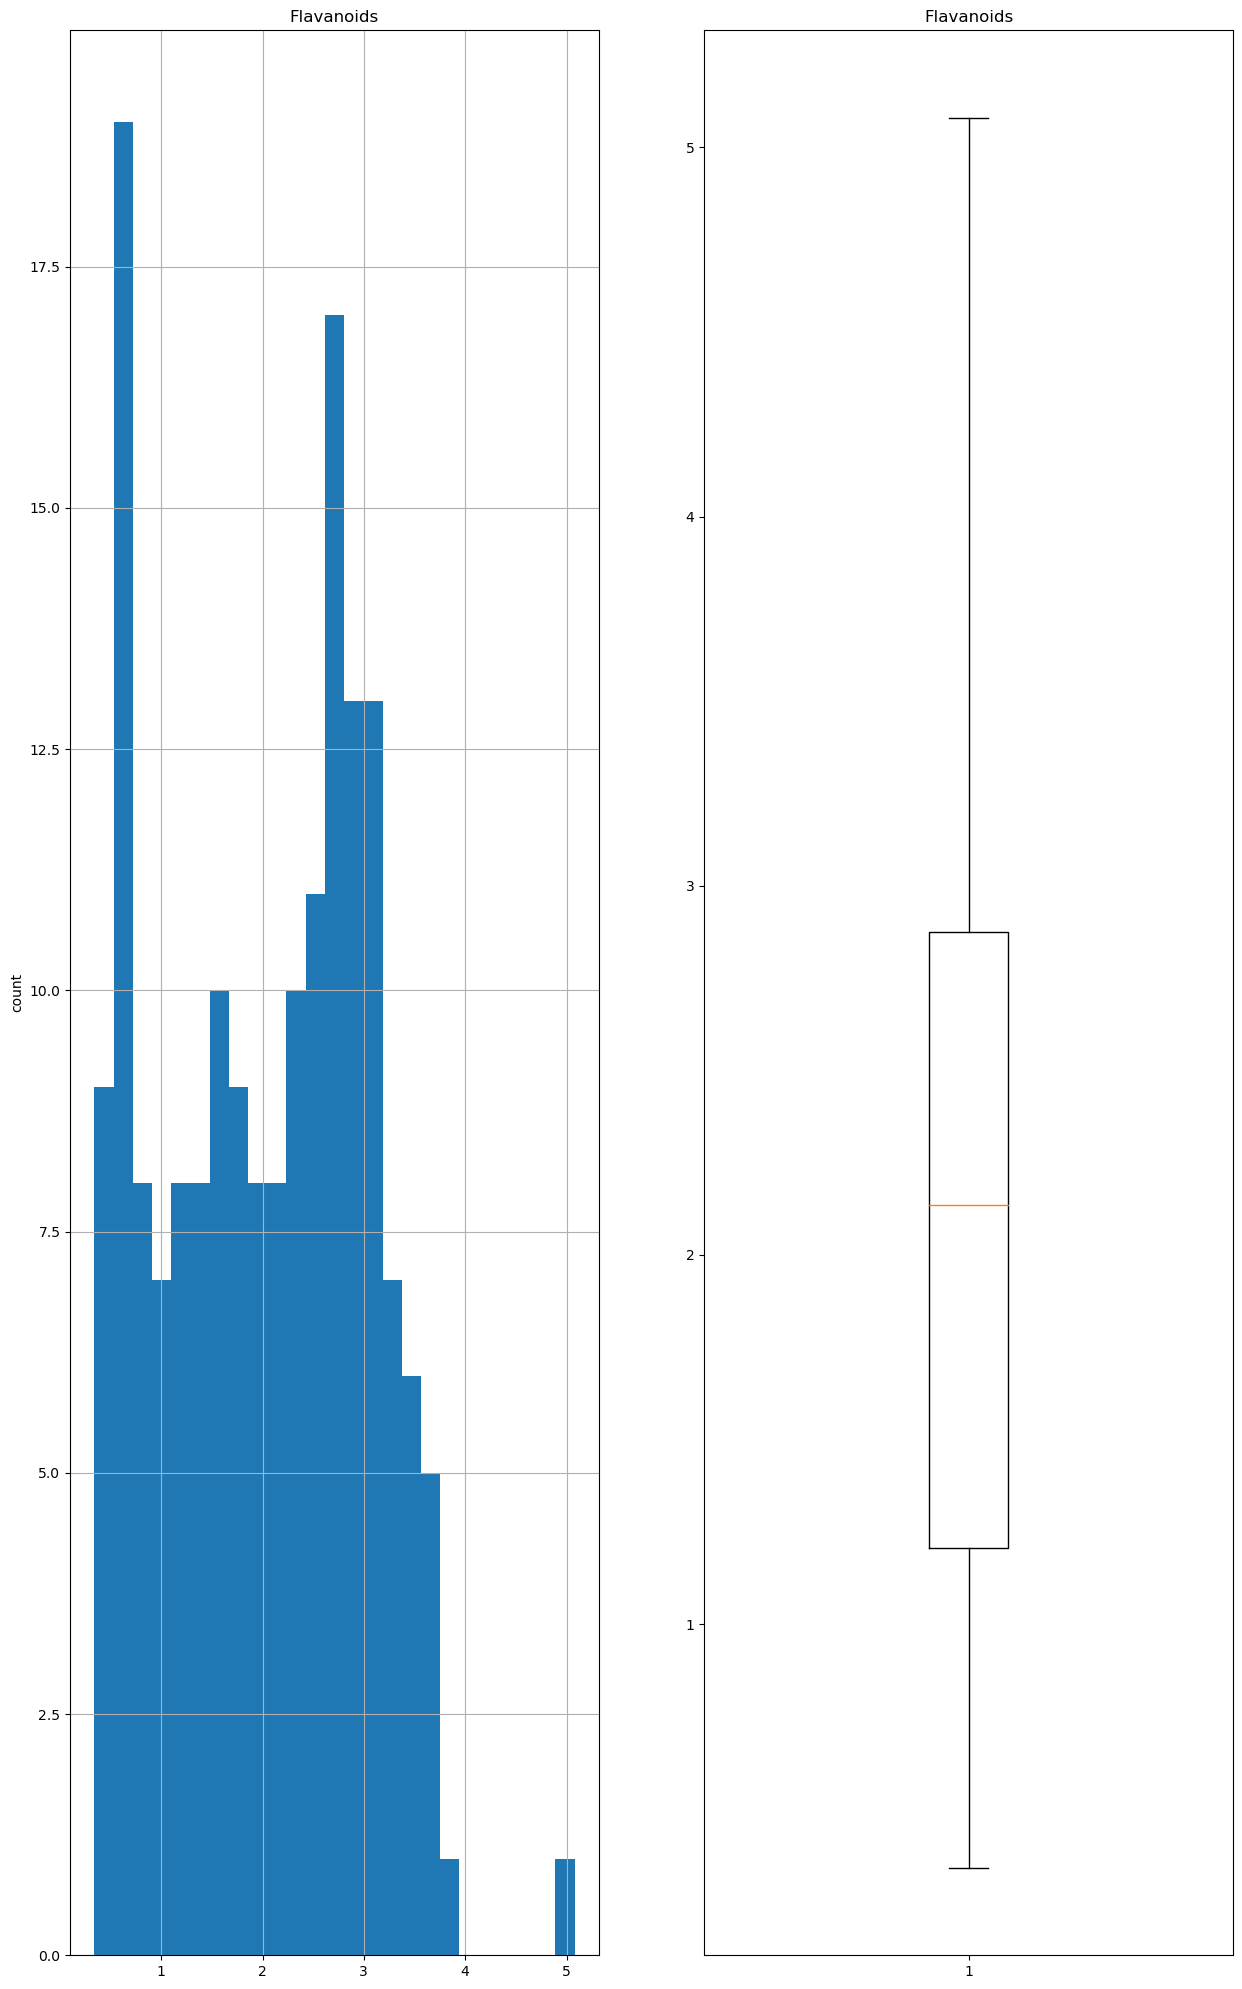

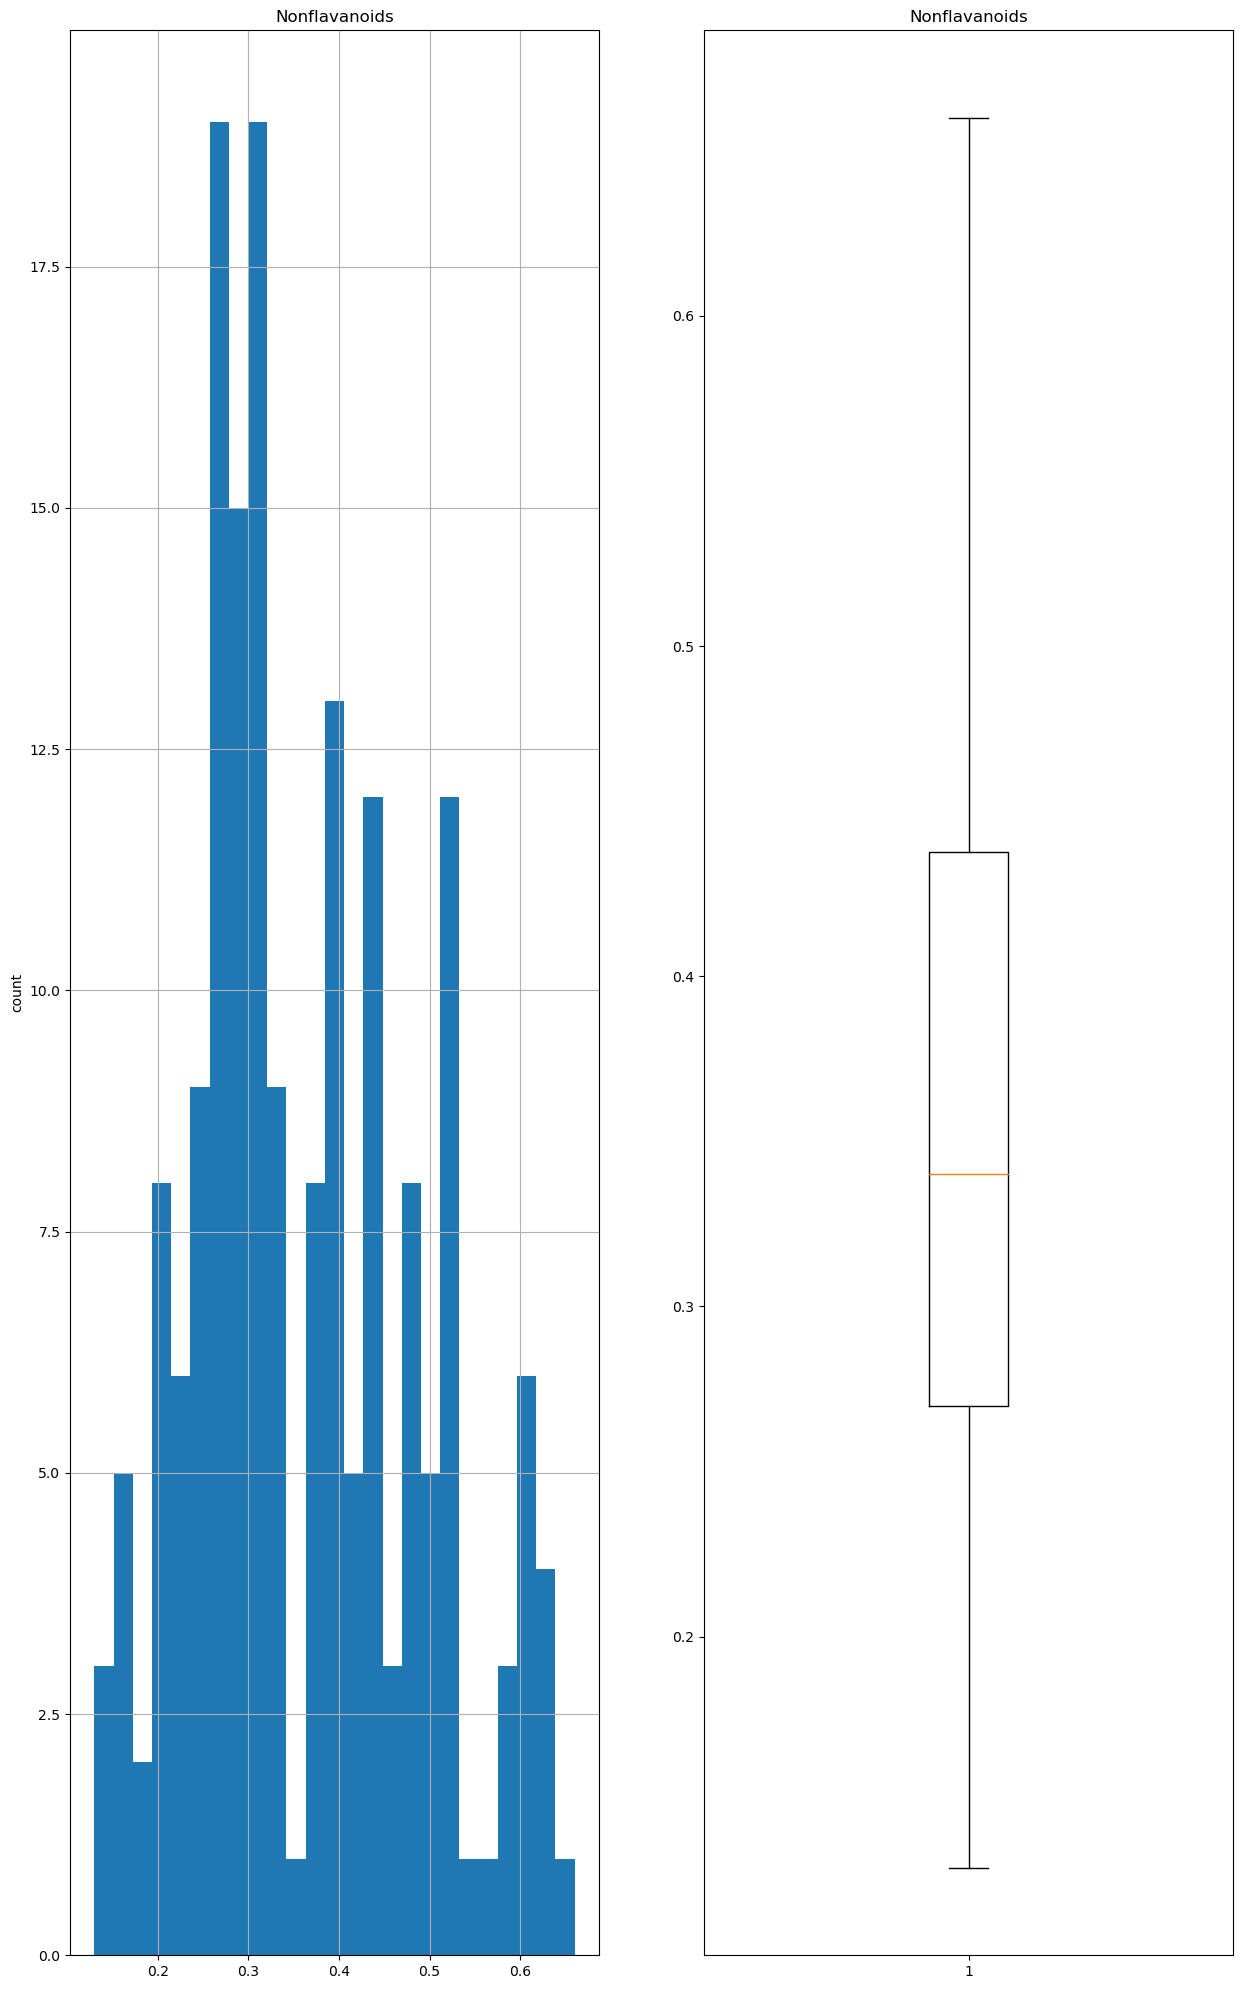

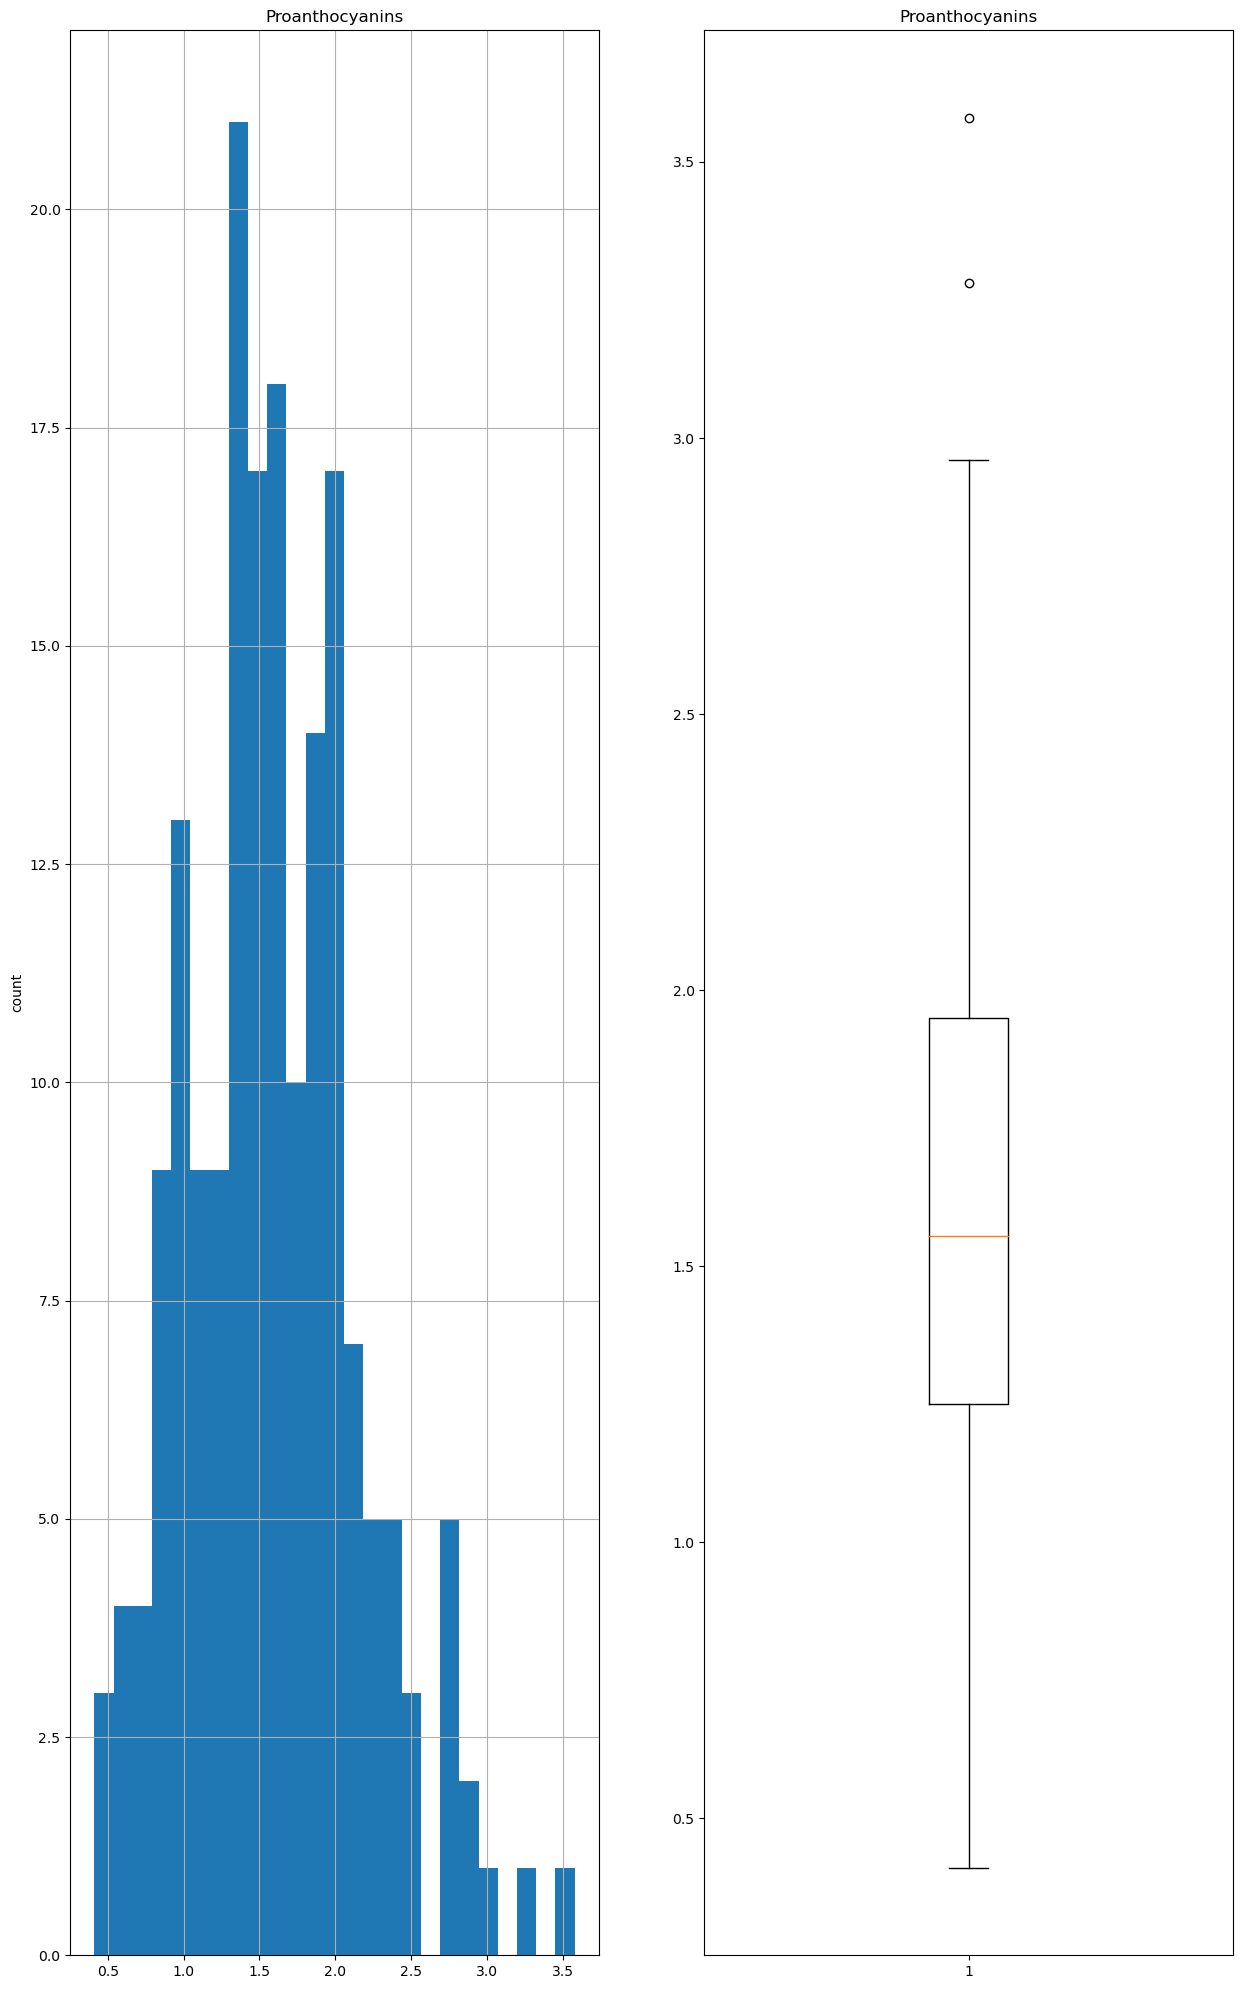

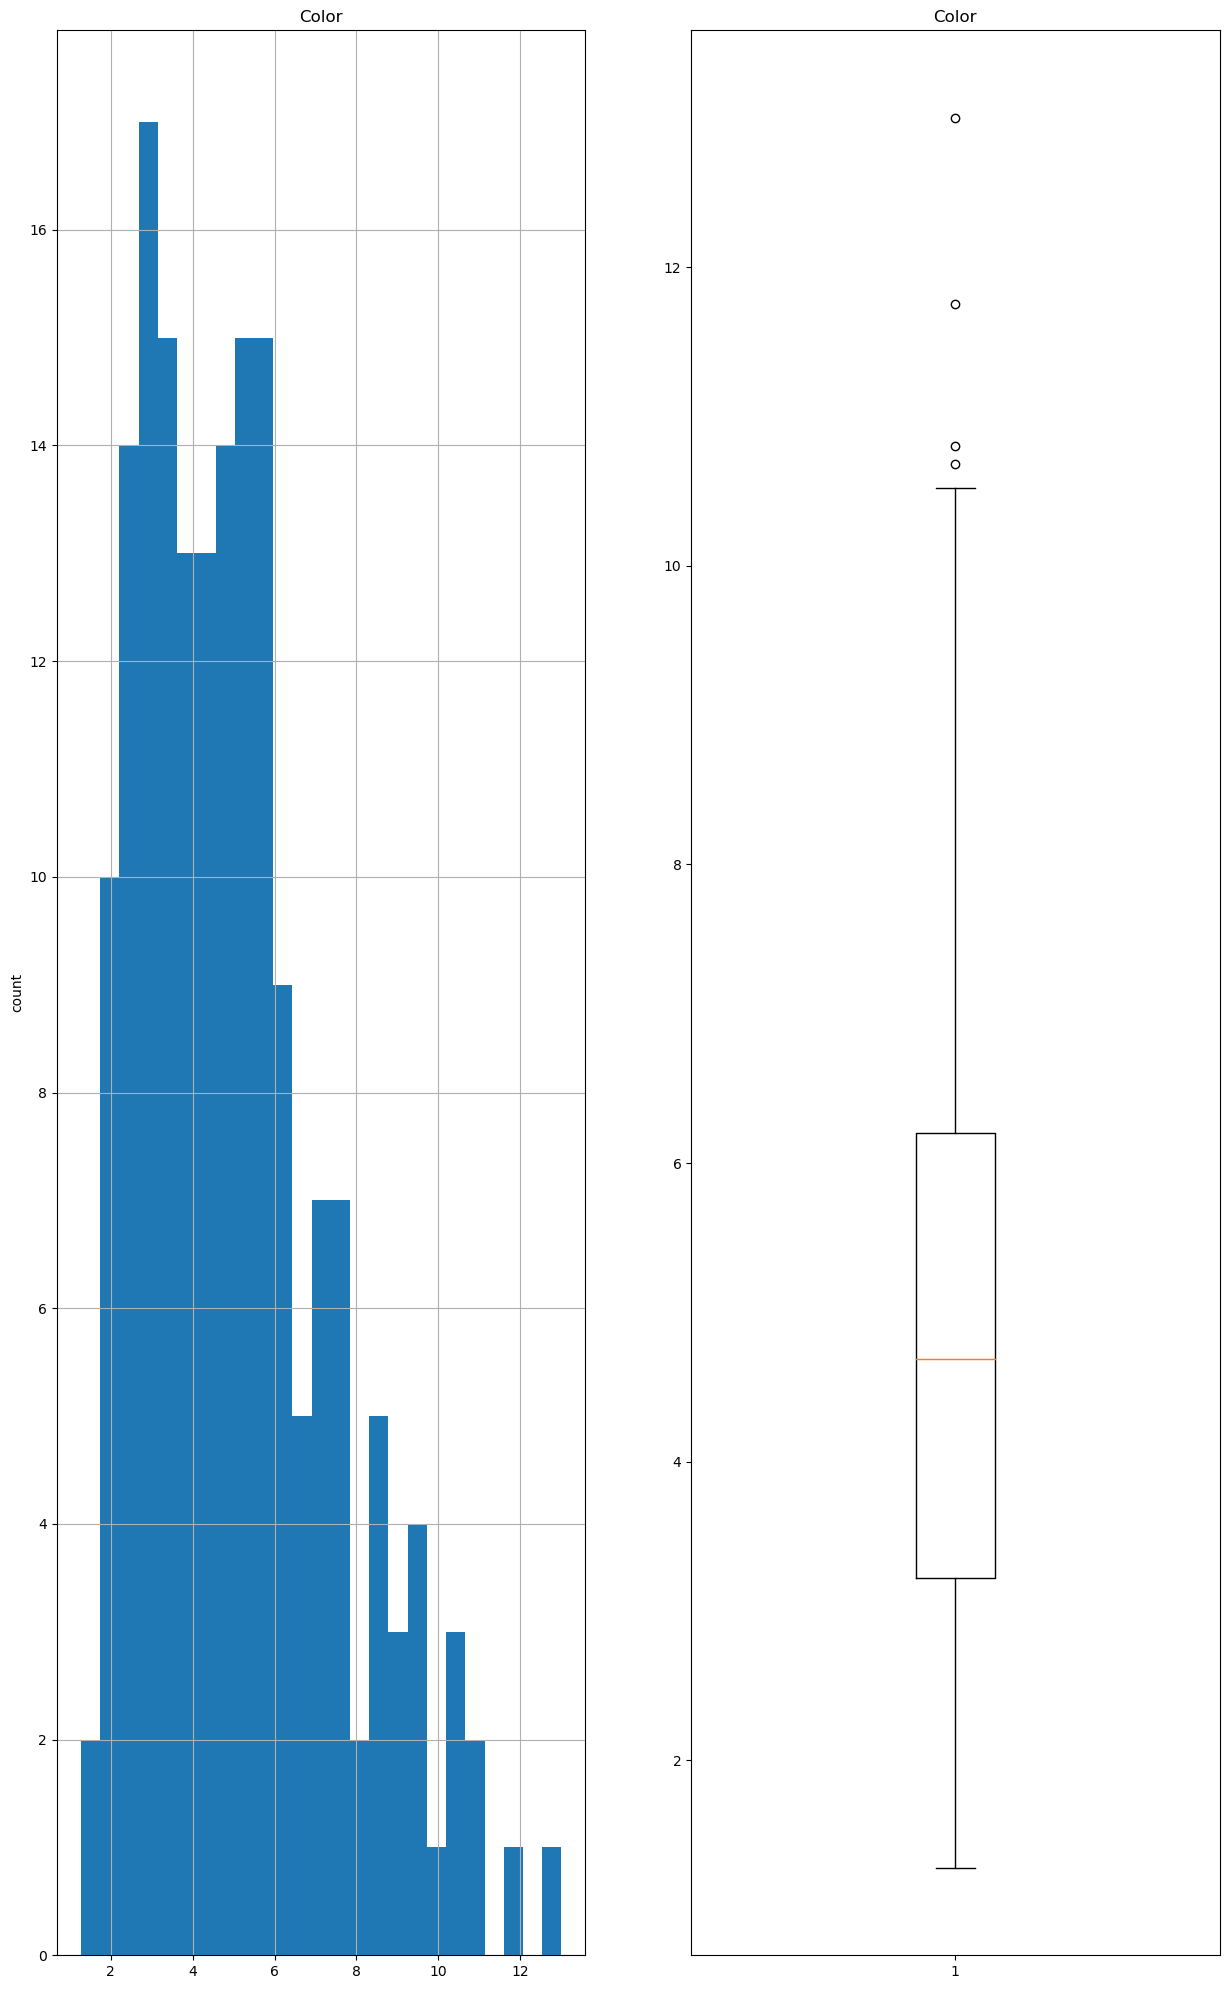

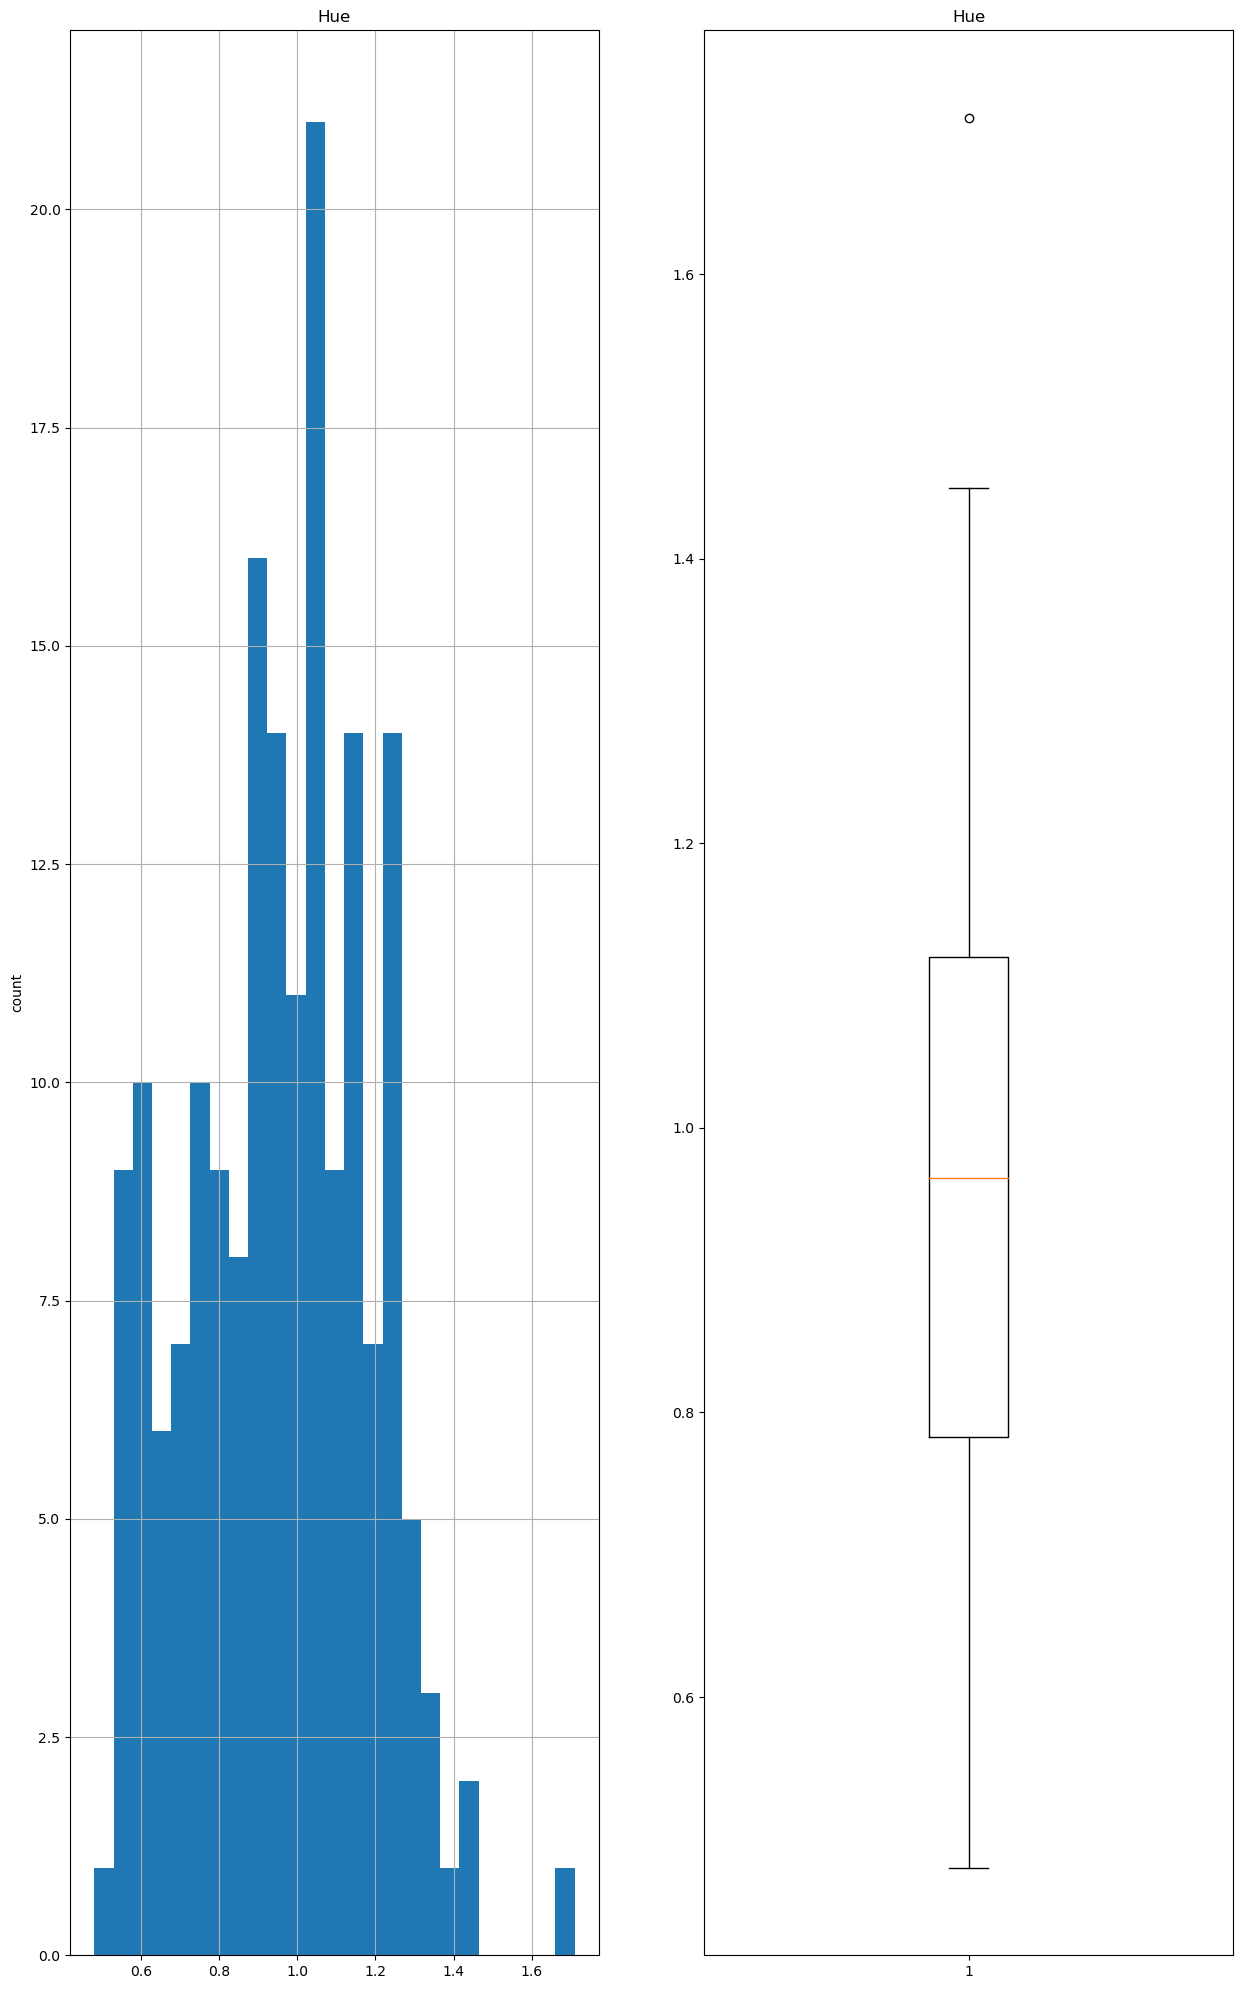

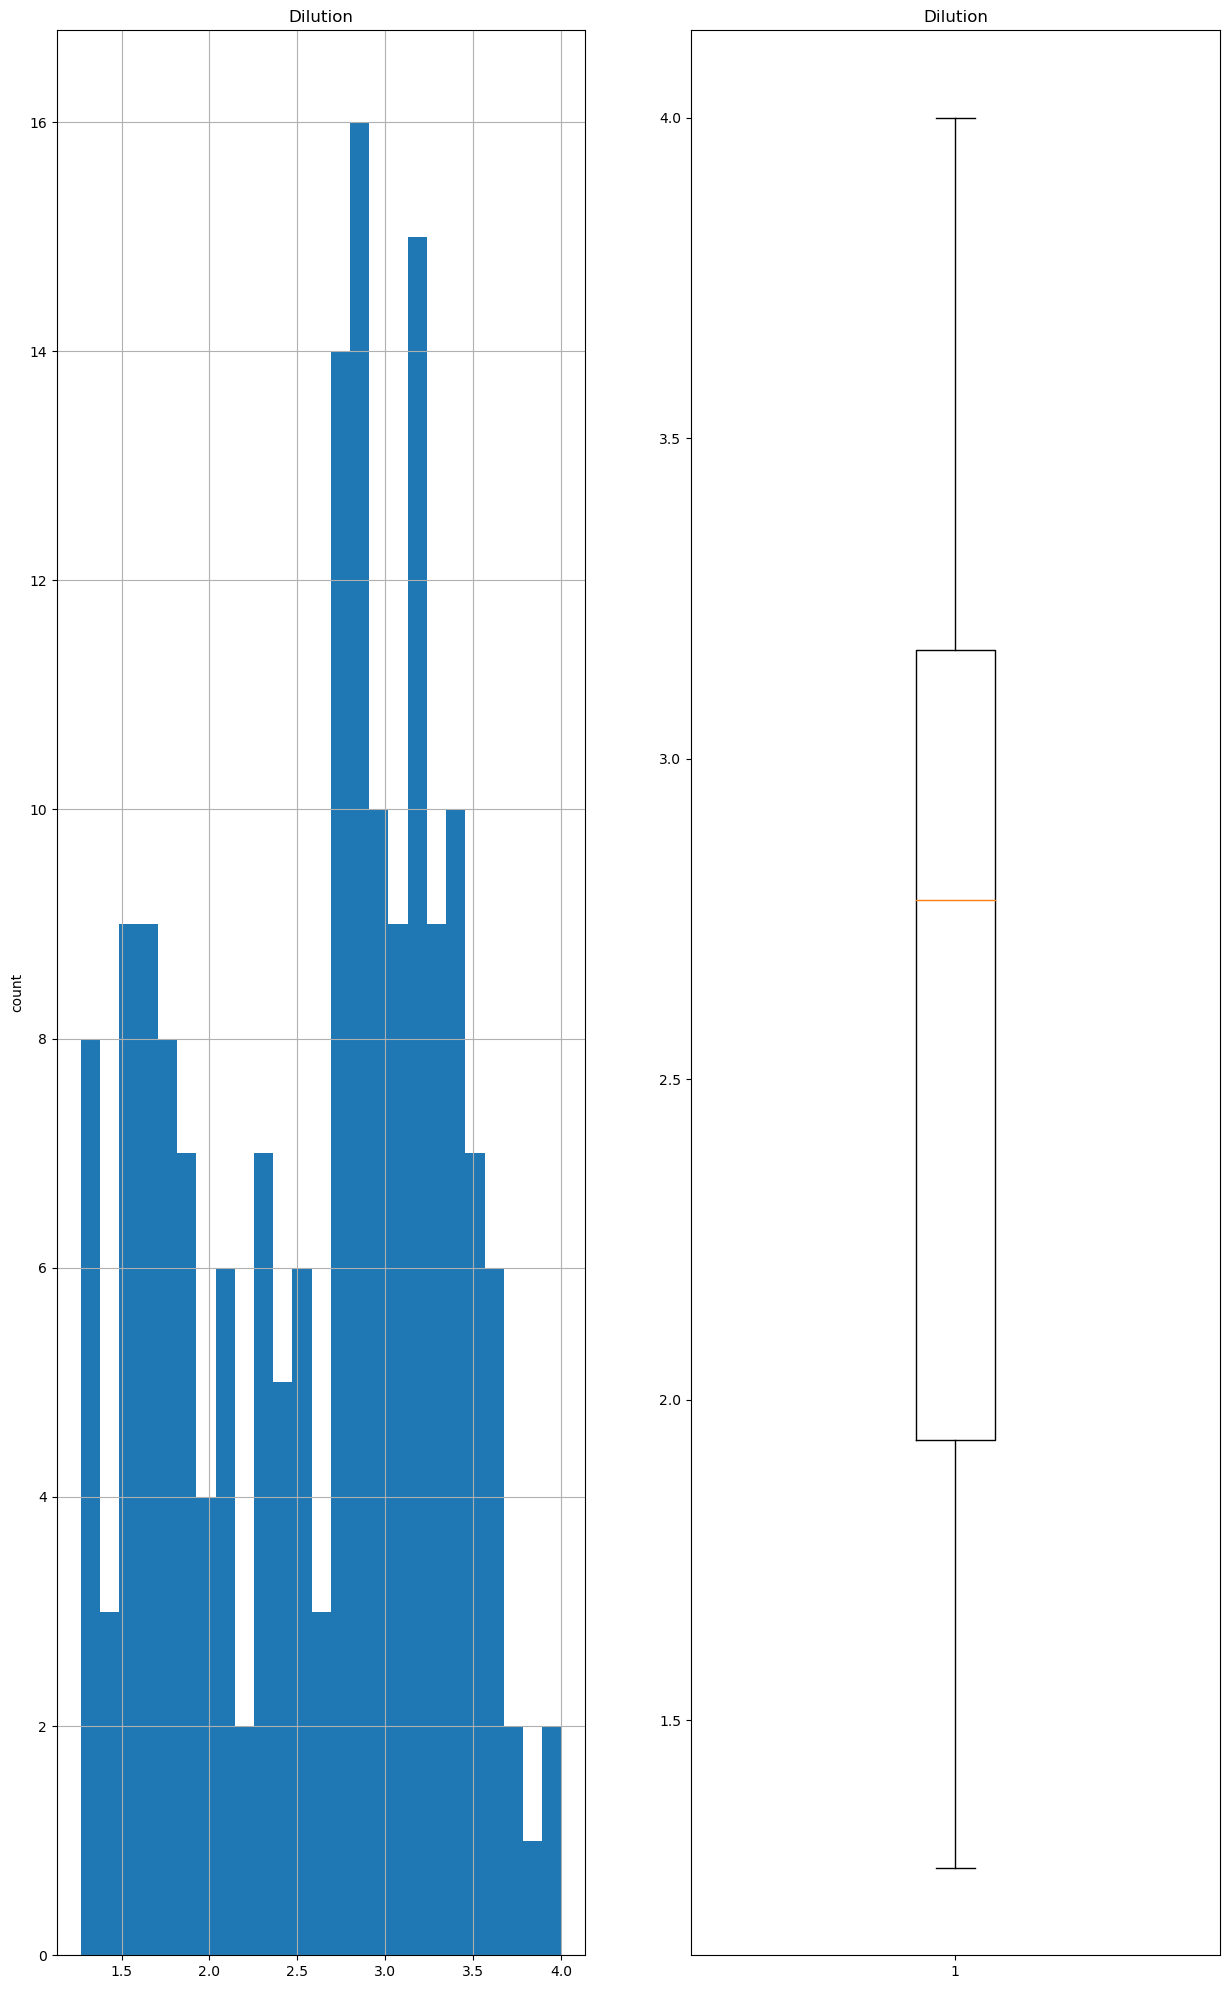

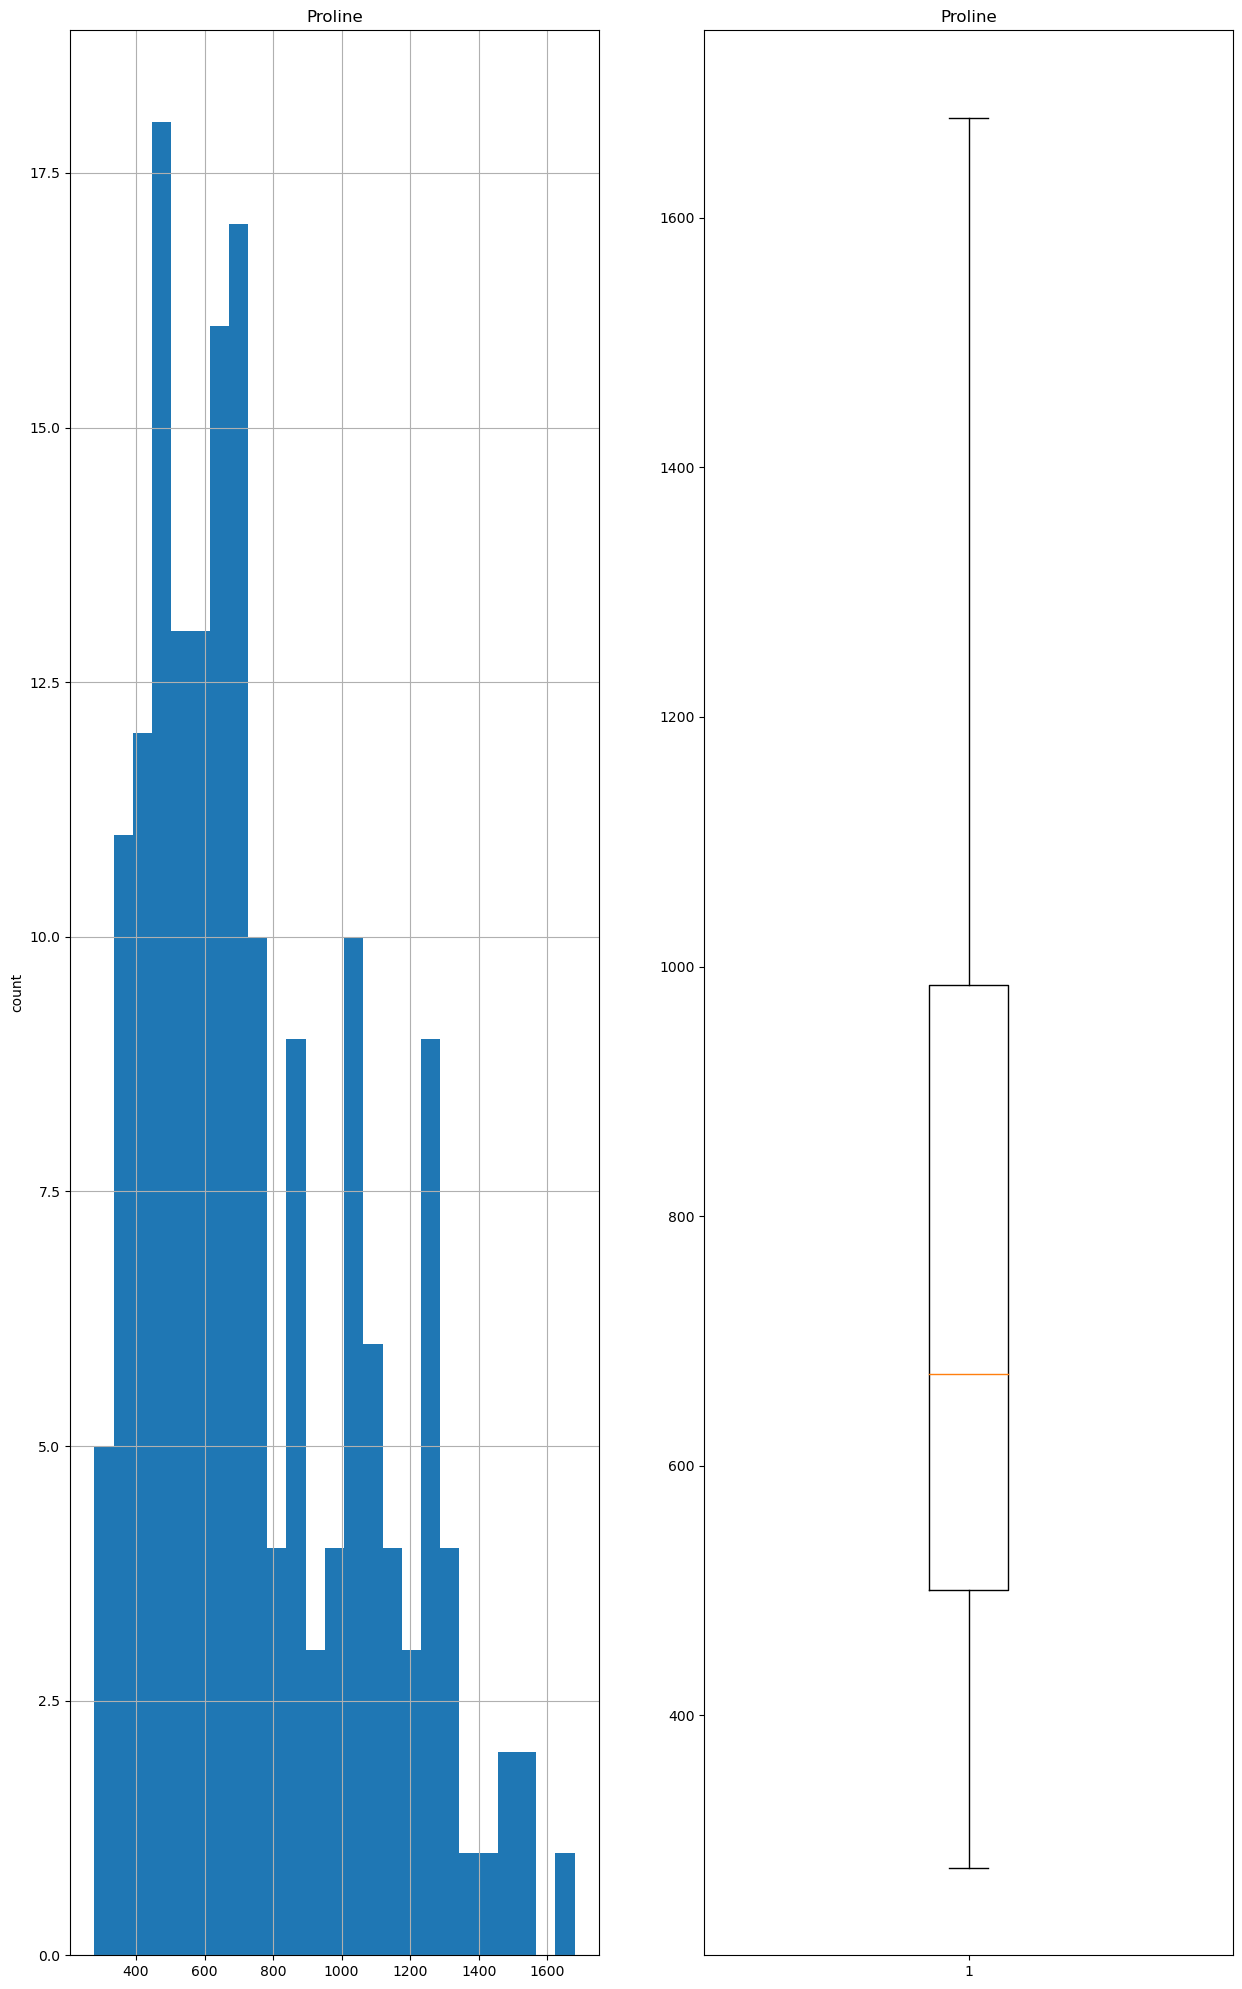

In [16]:
for feature in wine.columns:
  plt.figure(figsize=(15,25))
  plt.subplot(1,2,1)
  wine[feature].hist(bins=25)
  plt.ylabel("count")
  plt.title(feature)
  plt.subplot(1,2,2)
  plt.boxplot(wine[feature])
  plt.title(feature)
  plt.show()

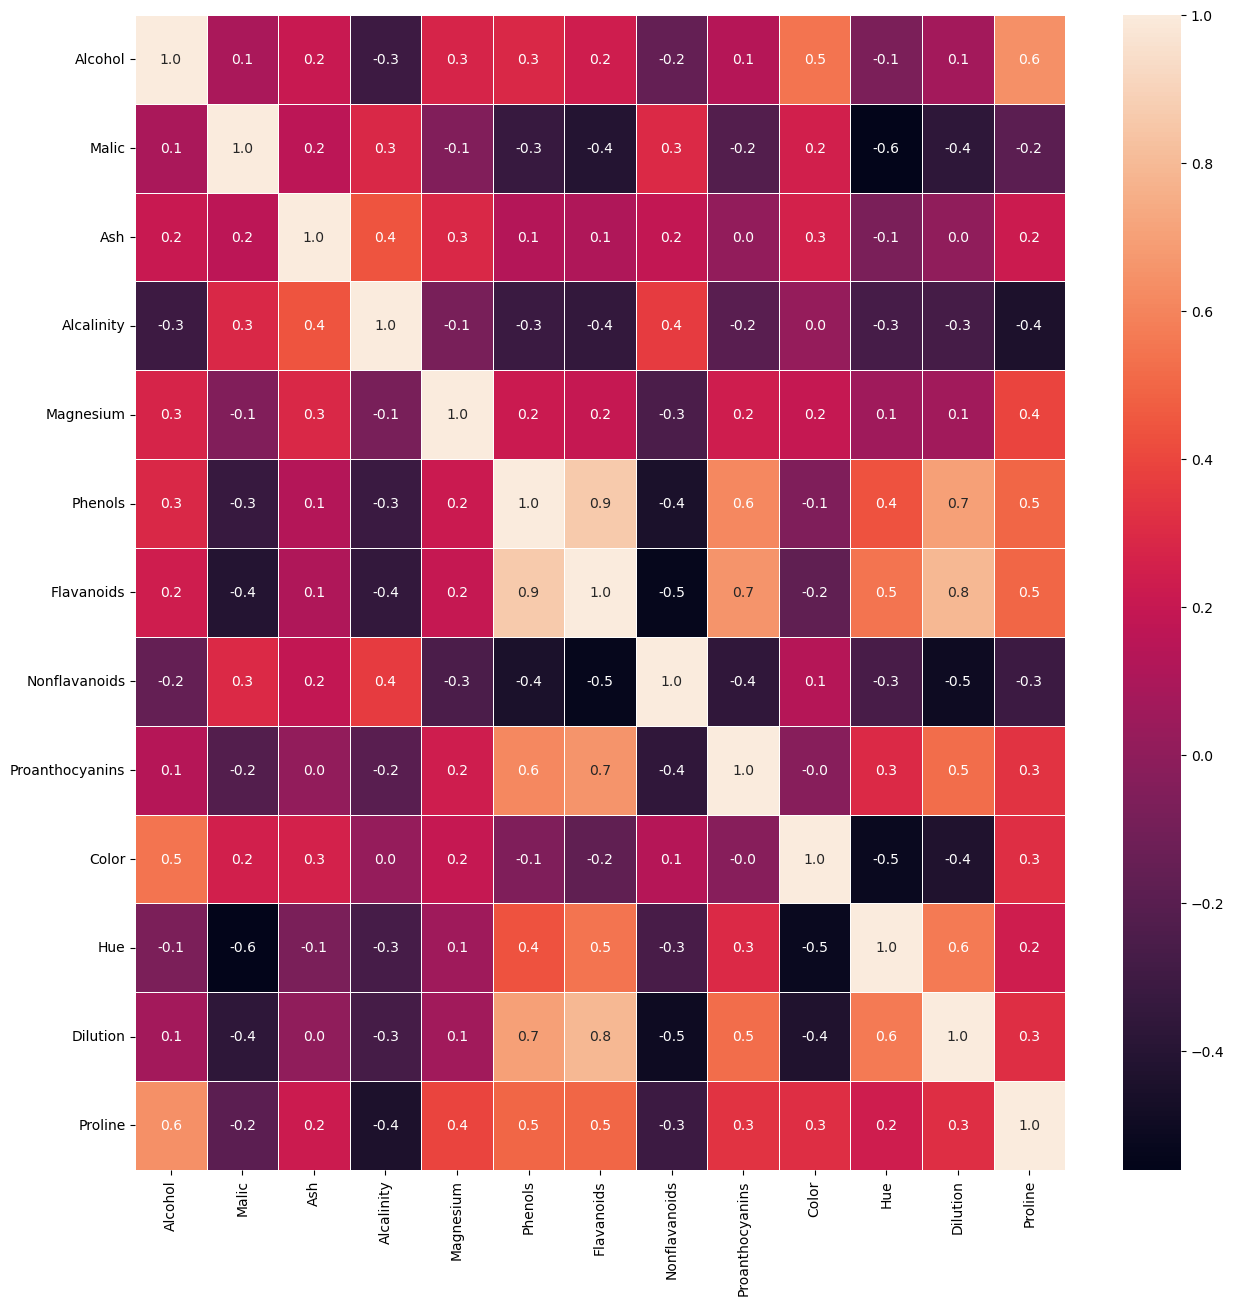

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(wine.corr(),annot=True,linewidths=0.5,fmt='.1f')
plt.show()

In [19]:
 # Strong positive correlation between:
 # Phenols - dilution
 # phenols - flavinoids
# Flavanoids - dilution
#Flavinoids - proanthocyanin

In [20]:
 # Data preprocessing
# Normalization

In [21]:
minmax=MinMaxScaler()
min_norm=minmax.fit_transform(wine)
min_norm

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [22]:
scaler=StandardScaler()
standard=scaler.fit_transform(wine)
standard

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# PCA  for normalized data

In [24]:
pca=PCA()
pca_value=pca.fit_transform(min_norm)
pca_value

array([[-0.70633576, -0.25319275,  0.02409269, ...,  0.04971144,
        -0.02001158, -0.00872296],
       [-0.4849768 , -0.00882289, -0.28048205, ...,  0.07415784,
        -0.05083753, -0.00524944],
       [-0.52117227, -0.18918722,  0.19621674, ...,  0.0121311 ,
        -0.10418449, -0.02316441],
       ...,
       [ 0.62631289, -0.54685701, -0.03049476, ...,  0.13116697,
         0.11160576,  0.0389133 ],
       [ 0.5729911 , -0.42551609, -0.09453672, ...,  0.03027458,
         0.05732893,  0.01103053],
       [ 0.701764  , -0.51350498,  0.29390996, ..., -0.02784028,
         0.01873501, -0.06648261]])

In [25]:
var=pca.explained_variance_ratio_
var

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

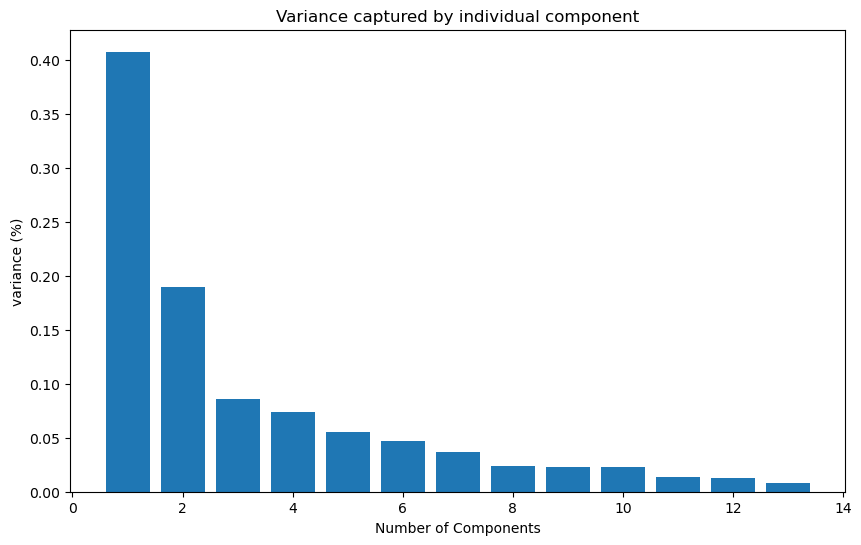

In [26]:
#varience captured by 
plt.figure(figsize=(10,6))
plt.bar(range(1,len(var)+1) , var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Variance captured by individual component')
plt.show()

In [27]:
var1=np.cumsum(np.round(var,4)*100)
var1

array([ 40.75,  59.72,  68.28,  75.71,  81.28,  85.94,  89.6 ,  92.01,
        94.28,  96.53,  97.91,  99.18, 100.  ])

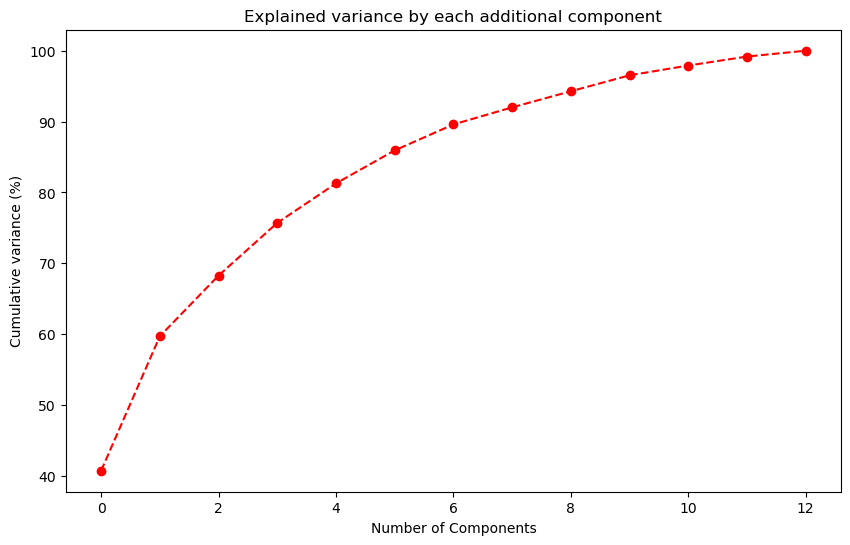

In [28]:
plt.figure(figsize=(10,6))
plt.plot(var1,color="red", linestyle='--', marker='o') 
plt.xlabel('Number of Components')
plt.title('Explained variance by each additional component')
plt.ylabel('Cumulative variance (%)')
plt.show()

In [29]:
pca=PCA(n_components=3)
pca_value=pca.fit_transform(min_norm)
pca_value

array([[-7.06335756e-01, -2.53192753e-01,  2.40926932e-02],
       [-4.84976802e-01, -8.82289142e-03, -2.80482048e-01],
       [-5.21172266e-01, -1.89187222e-01,  1.96216736e-01],
       [-8.21643663e-01, -5.80905512e-01,  8.11097172e-02],
       [-2.02546382e-01, -5.94665740e-02,  3.00239941e-01],
       [-6.08190152e-01, -4.87519191e-01, -7.54332321e-02],
       [-5.44047399e-01, -3.00196497e-01, -1.05074621e-01],
       [-4.74357495e-01, -2.98197021e-01, -2.82149308e-03],
       [-5.00432012e-01, -3.07602859e-01, -2.30493613e-01],
       [-6.27517969e-01, -2.06328233e-01, -1.14147932e-01],
       [-7.27467157e-01, -3.56512044e-01, -5.04199490e-02],
       [-3.74967744e-01, -2.25424535e-01, -2.86134083e-01],
       [-4.48188283e-01, -2.31938139e-01, -1.67908053e-01],
       [-6.26345329e-01, -3.55138677e-01, -8.58356579e-02],
       [-8.35717011e-01, -5.38047802e-01, -1.15202943e-01],
       [-4.71931568e-01, -3.37405385e-01, -7.27821607e-02],
       [-4.26990905e-01, -4.50842684e-01

In [30]:
var=pca.explained_variance_ratio_
var

array([0.40749485, 0.18970352, 0.08561671])

In [31]:
var1=np.cumsum(np.round(var,4)*100)
var1

array([40.75, 59.72, 68.28])

In [32]:
wine_norm_pca=pd.DataFrame(data=pca_value,columns=["PC1","PC2","PC3"])
wine_norm_pca

,PC1,PC2,PC3
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240
...,...,...,...
173,0.739510,-0.471901,0.209360
174,0.581781,-0.348366,0.083590
175,0.626313,-0.546857,-0.030495
176,0.572991,-0.425516,-0.094537


In [34]:
 # pca for standardardized data

In [35]:
pca=PCA()
pca_values=pca.fit_transform(standard)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [36]:
var=pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [37]:
var1=np.cumsum(np.round(var,4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

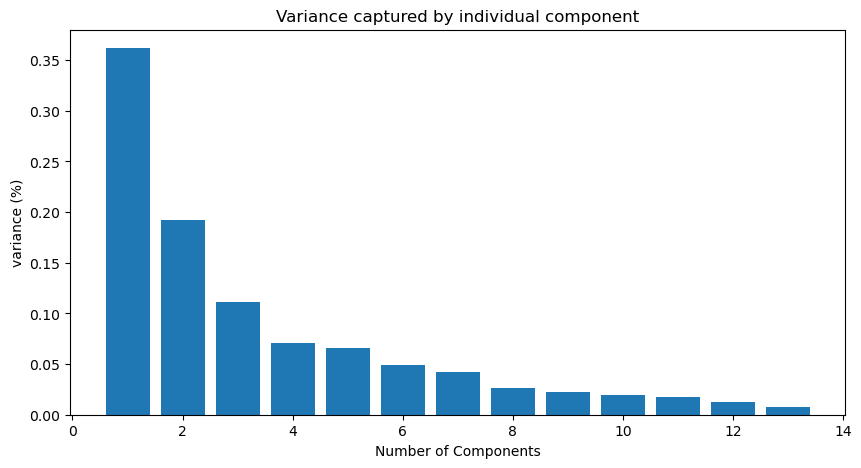

In [38]:
#Variance captured by individual PCs.
plt.figure(figsize=(10,5))
plt.bar(range(1,len(var)+1) , var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Variance captured by individual component')
plt.show()

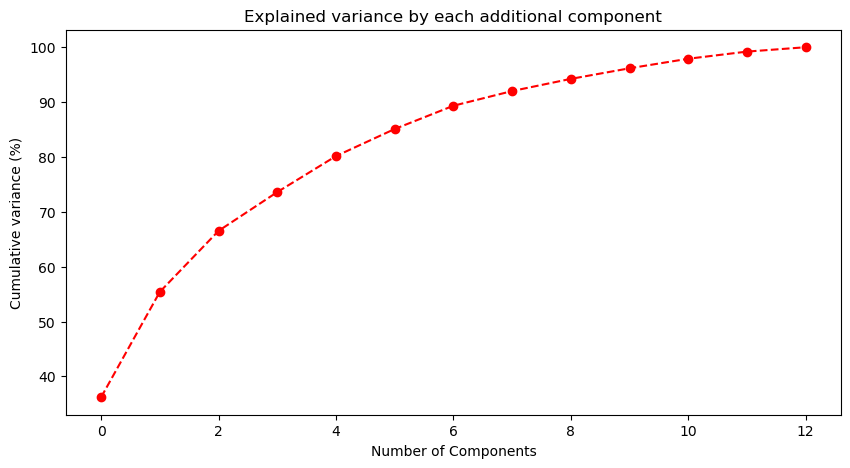

In [39]:
# Commulative Variance plot 
plt.figure(figsize=(10,5))
plt.plot(var1,color="red", linestyle='--', marker='o') 
plt.xlabel('Number of Components')
plt.title('Explained variance by each additional component')
plt.ylabel('Cumulative variance (%)')
plt.show()

In [40]:
pca=PCA(n_components=3)
pca_values=pca.fit_transform(standard)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [41]:
var=pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631])

In [42]:
var1=np.cumsum(np.round(var,4)*100)
var1

array([36.2 , 55.41, 66.53])

In [43]:
wine_stand_pca=pd.DataFrame(data=pca_values,columns=["PC1","PC2","PC3"])
wine_stand_pca

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [45]:
# clustering
#1.Hierarchical Clustering

In [46]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.metrics import silhouette_score as sil  

In [48]:
# for normalised data

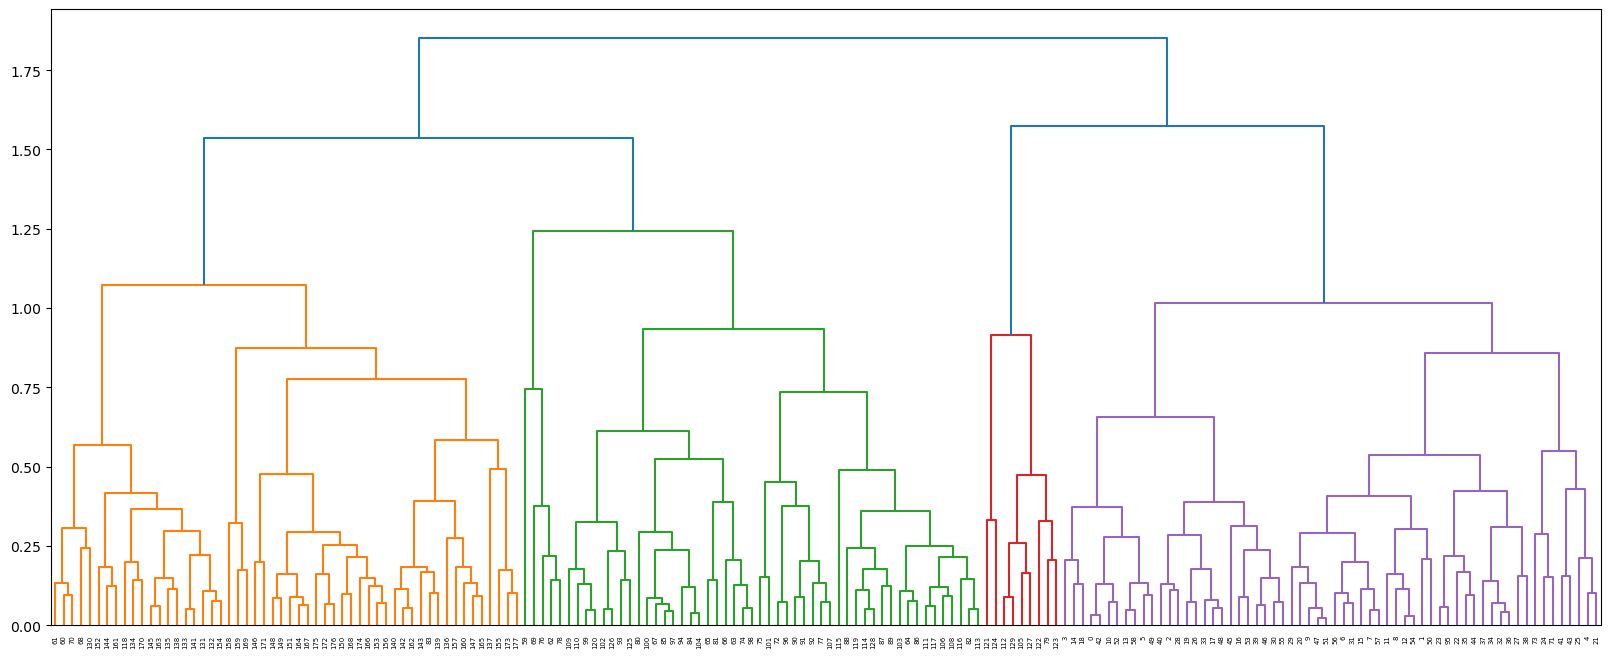

In [49]:
from seaborn.matrix import dendrogram
plt.figure(figsize=(20,8))
dendrogram=sch.dendrogram(sch.linkage(wine_norm_pca,method="complete"))

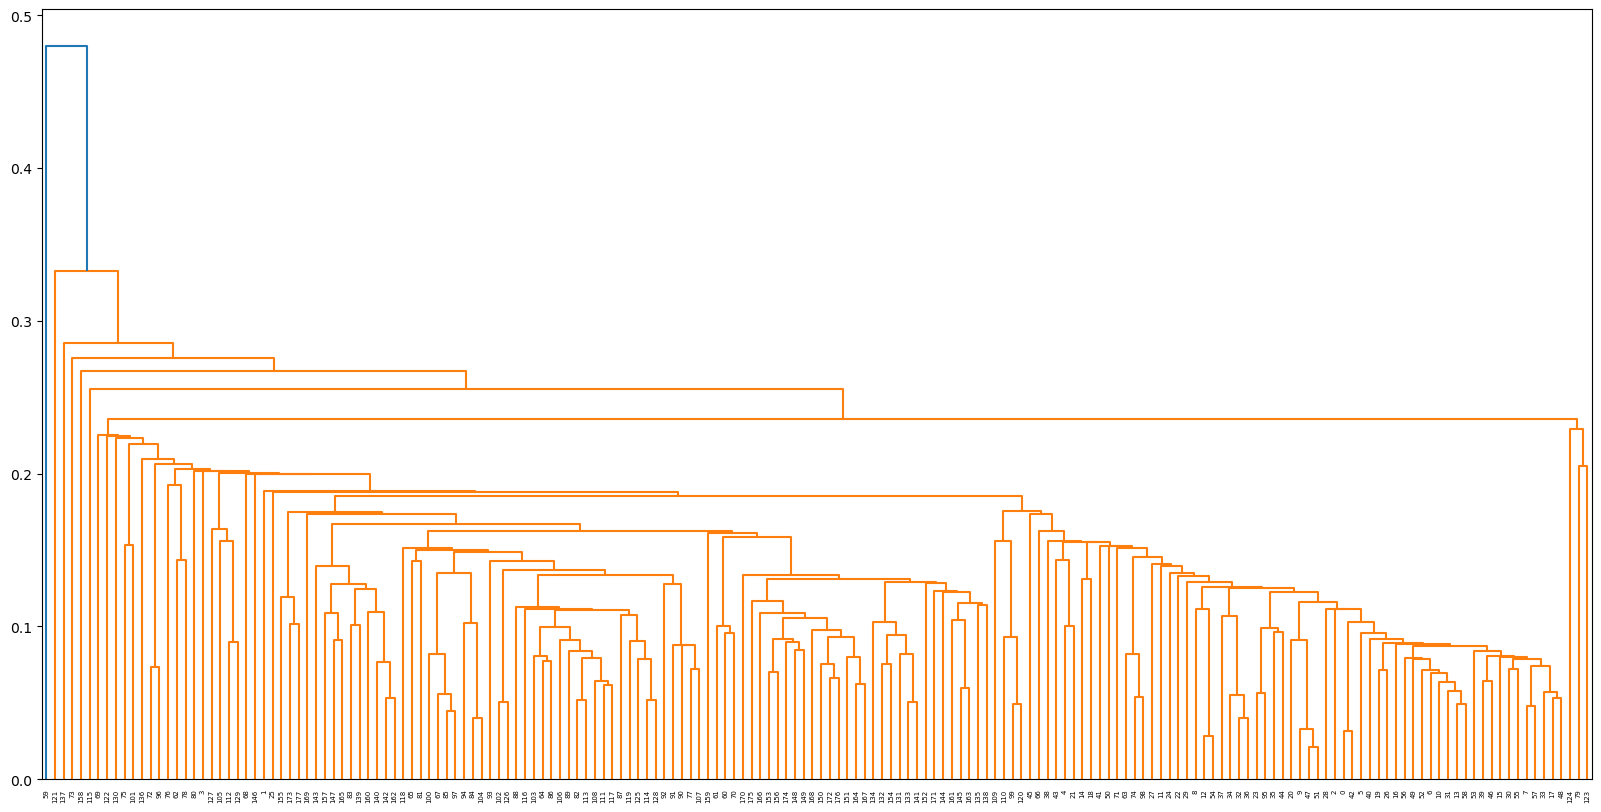

In [50]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(wine_norm_pca,method='single'))

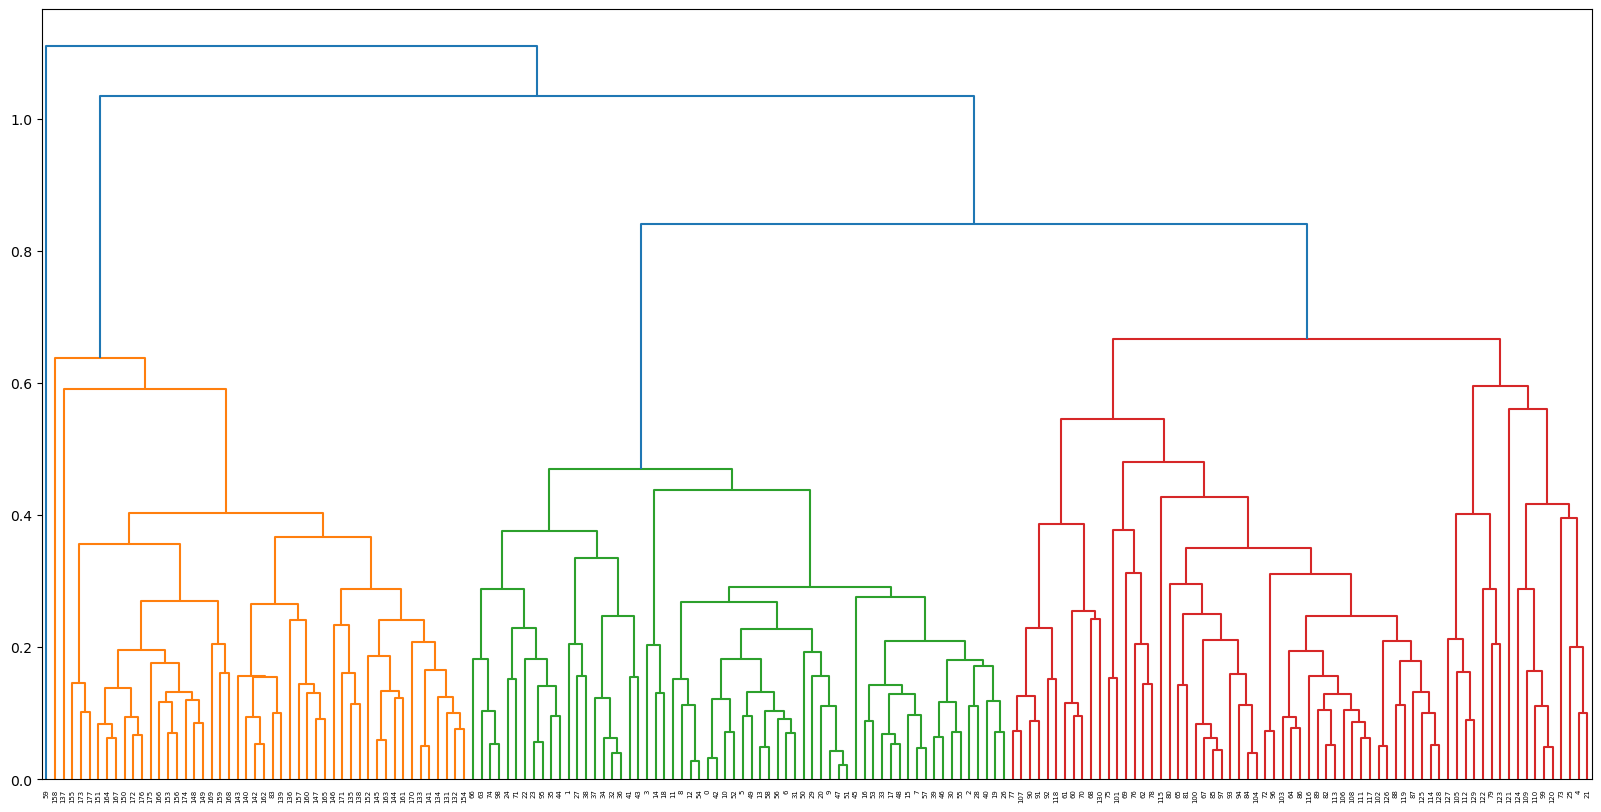

In [51]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(wine_norm_pca,method='average'))

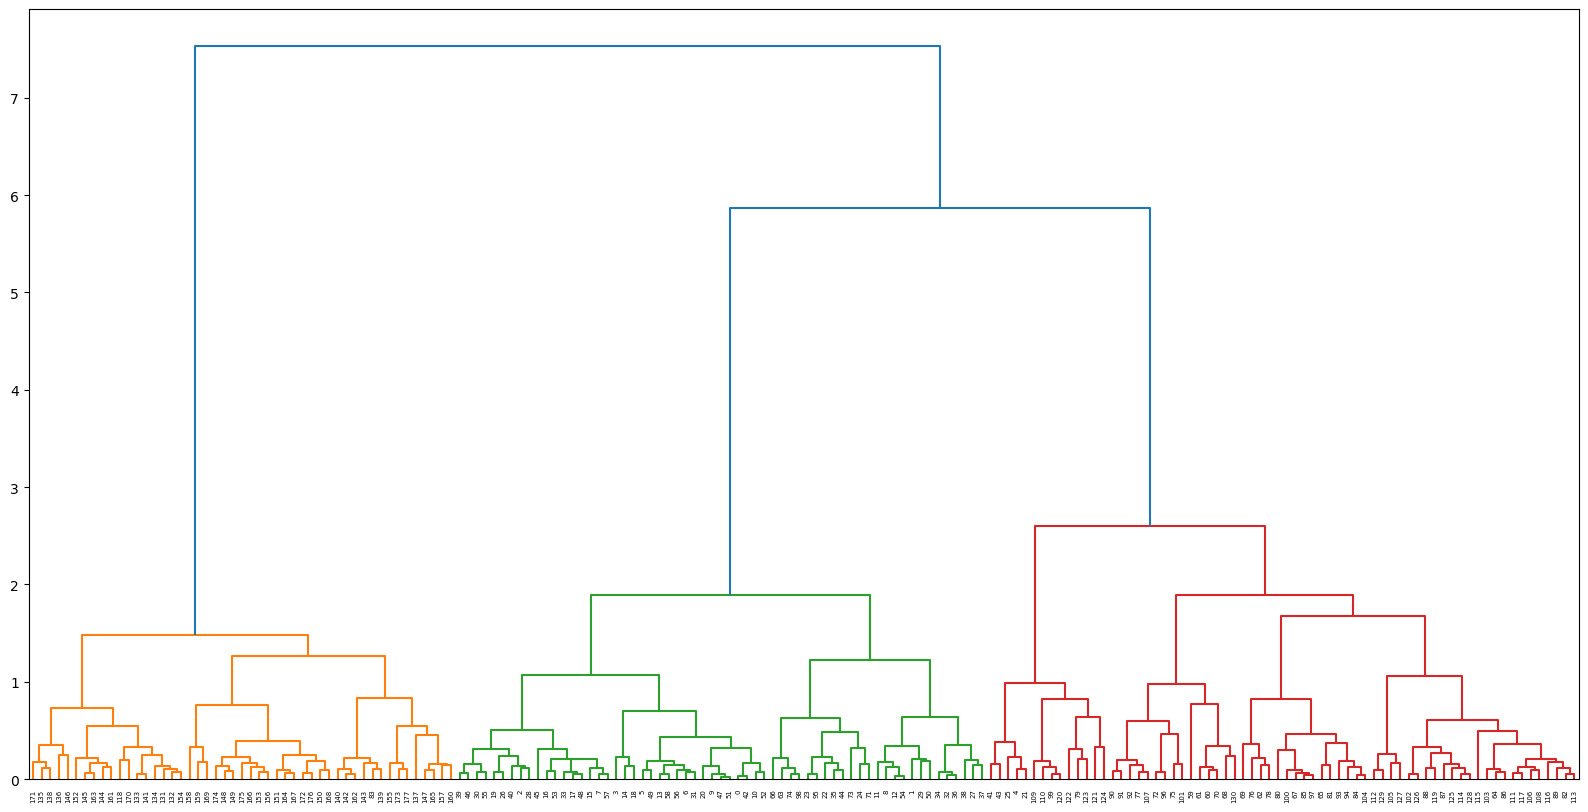

In [52]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(wine_norm_pca,method='ward'))

In [53]:

linkage=["single","complete","average","ward"]
for i in range(2,6):
  for x in linkage:
    hc=AgglomerativeClustering(n_clusters=i, linkage=x)
    y_hc=hc.fit_predict(wine_norm_pca)
    sil_score=sil(wine_norm_pca,y_hc)
    print("for n=",i,"linkage=",x,"Silhouette score is=",np.round(sil_score,4))

for n= 2 linkage= single Silhouette score is= 0.2657
for n= 2 linkage= complete Silhouette score is= 0.3385
for n= 2 linkage= average Silhouette score is= 0.2657
for n= 2 linkage= ward Silhouette score is= 0.4276
for n= 3 linkage= single Silhouette score is= 0.1421
for n= 3 linkage= complete Silhouette score is= 0.2801
for n= 3 linkage= average Silhouette score is= 0.3905
for n= 3 linkage= ward Silhouette score is= 0.4596
for n= 4 linkage= single Silhouette score is= -0.0004
for n= 4 linkage= complete Silhouette score is= 0.4451
for n= 4 linkage= average Silhouette score is= 0.4472
for n= 4 linkage= ward Silhouette score is= 0.4238
for n= 5 linkage= single Silhouette score is= -0.2007
for n= 5 linkage= complete Silhouette score is= 0.4163
for n= 5 linkage= average Silhouette score is= 0.4308
for n= 5 linkage= ward Silhouette score is= 0.3587


# for n=3 linkage=ward silhouette score is=0.4596 is maximum

In [54]:
# create clusters with ward linkage and n_clusters = 3
hc=AgglomerativeClustering(n_clusters=3,linkage="ward",affinity="euclidean")
y_hc=hc.fit_predict(wine_norm_pca)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [56]:
wine_og=pd.read_csv(r"E:\assignments csv  files\wine.csv")
wine_og["cluster_id"]=y_hc
wine_og[["Type","cluster_id"]]

,Type,cluster_id
0,1,2
1,1,2
2,1,2
3,1,2
4,1,0
...,...,...
173,3,1
174,3,1
175,3,1
176,3,1


In [57]:
wine_og.groupby("cluster_id").agg(["mean"])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster_id,,,,,,,,,,,,,,
0,1.941176,12.287794,2.037353,2.276765,20.144118,95.088235,2.197206,2.044853,0.369559,1.591765,3.077941,1.043324,2.784265,527.617647
1,2.959184,13.149796,3.386939,2.427755,21.397959,98.163265,1.680612,0.797959,0.455306,1.160816,7.328980,0.684694,1.707143,622.285714
2,1.114754,13.675410,1.825738,2.417377,17.242623,106.196721,2.897869,3.000984,0.278197,1.935410,5.441311,1.080820,3.145902,1091.426230


# As we can see from above 2 tables that there is negligible difference between clusters made by algorithm and pre defined clusters of original data set.

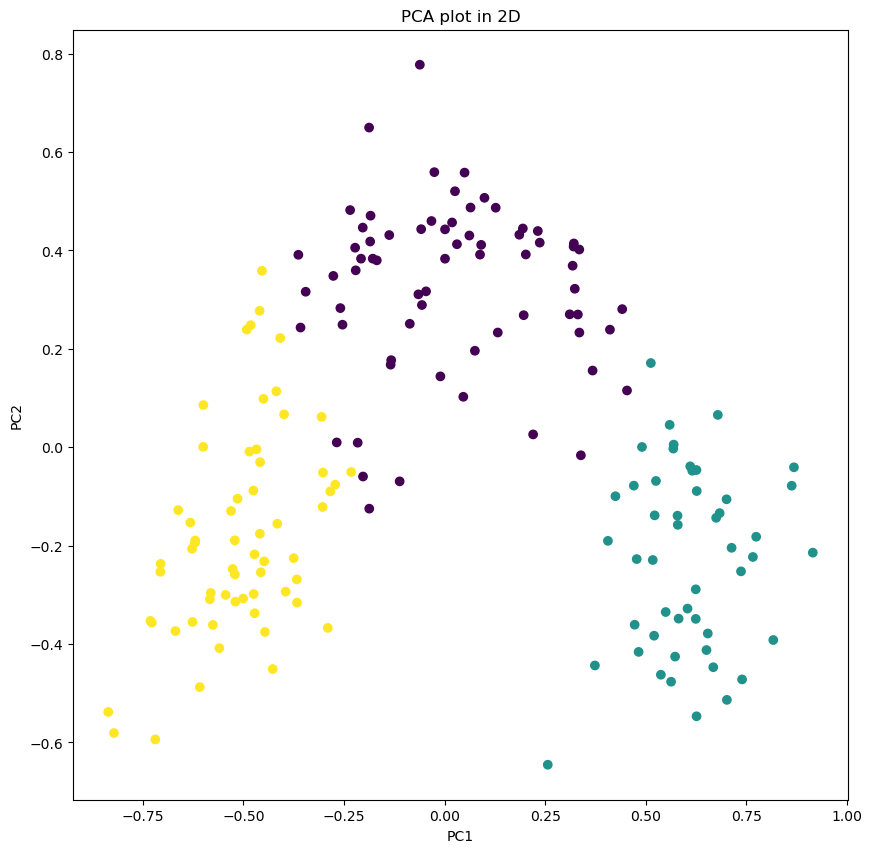

In [58]:
plt.figure(figsize=(10,10))
plt.scatter(wine_norm_pca.iloc[:,0],wine_norm_pca.iloc[:,1],c=wine_og.cluster_id)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [59]:
# for standardised PCA data

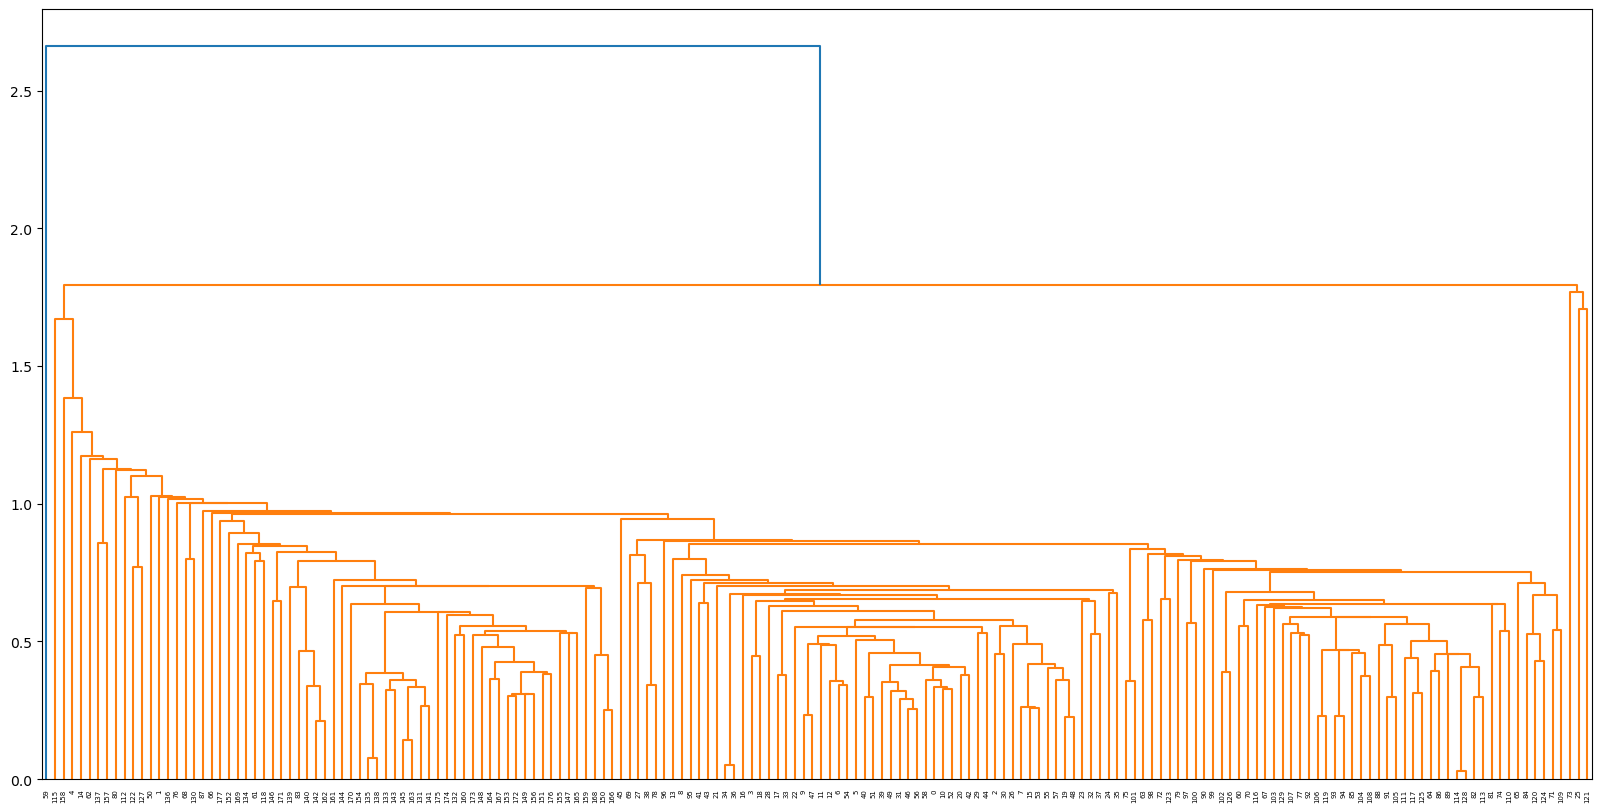

In [60]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(wine_stand_pca,method="single"))

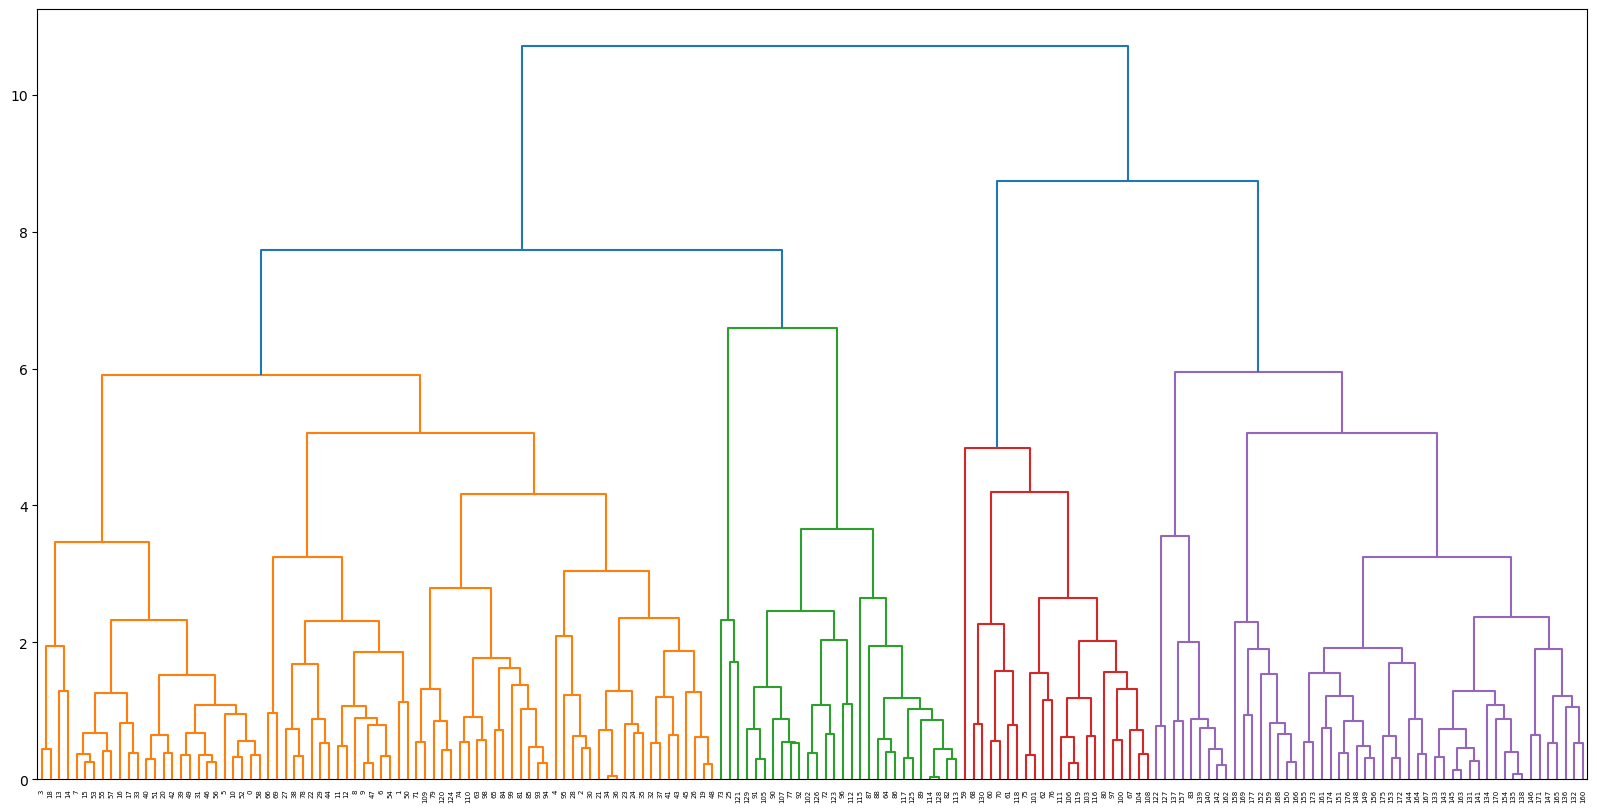

In [61]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(wine_stand_pca,method="complete"))

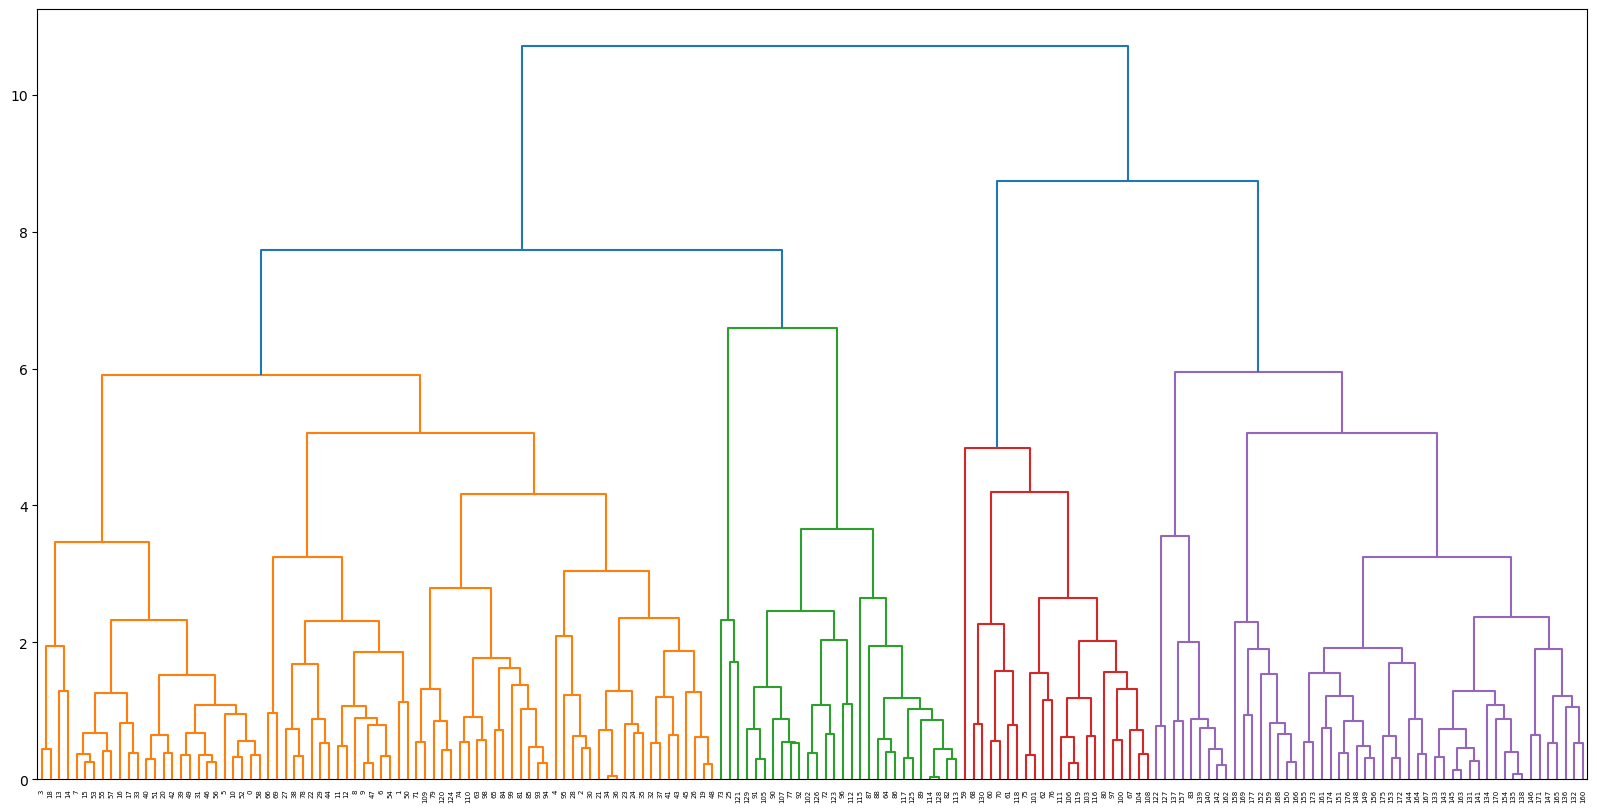

In [62]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(wine_stand_pca,method="complete"))

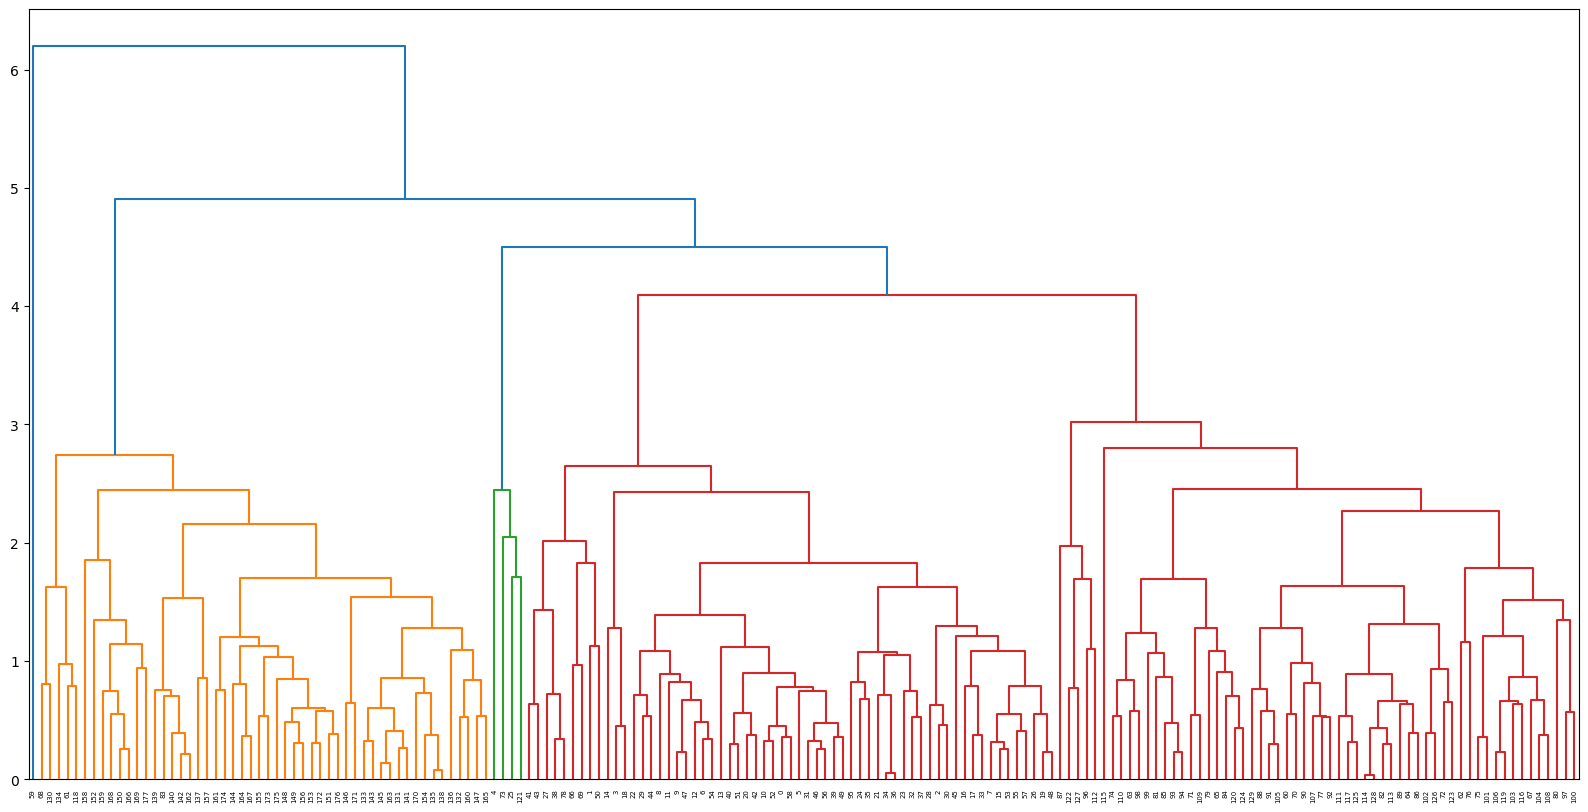

In [63]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(wine_stand_pca,method="average"))

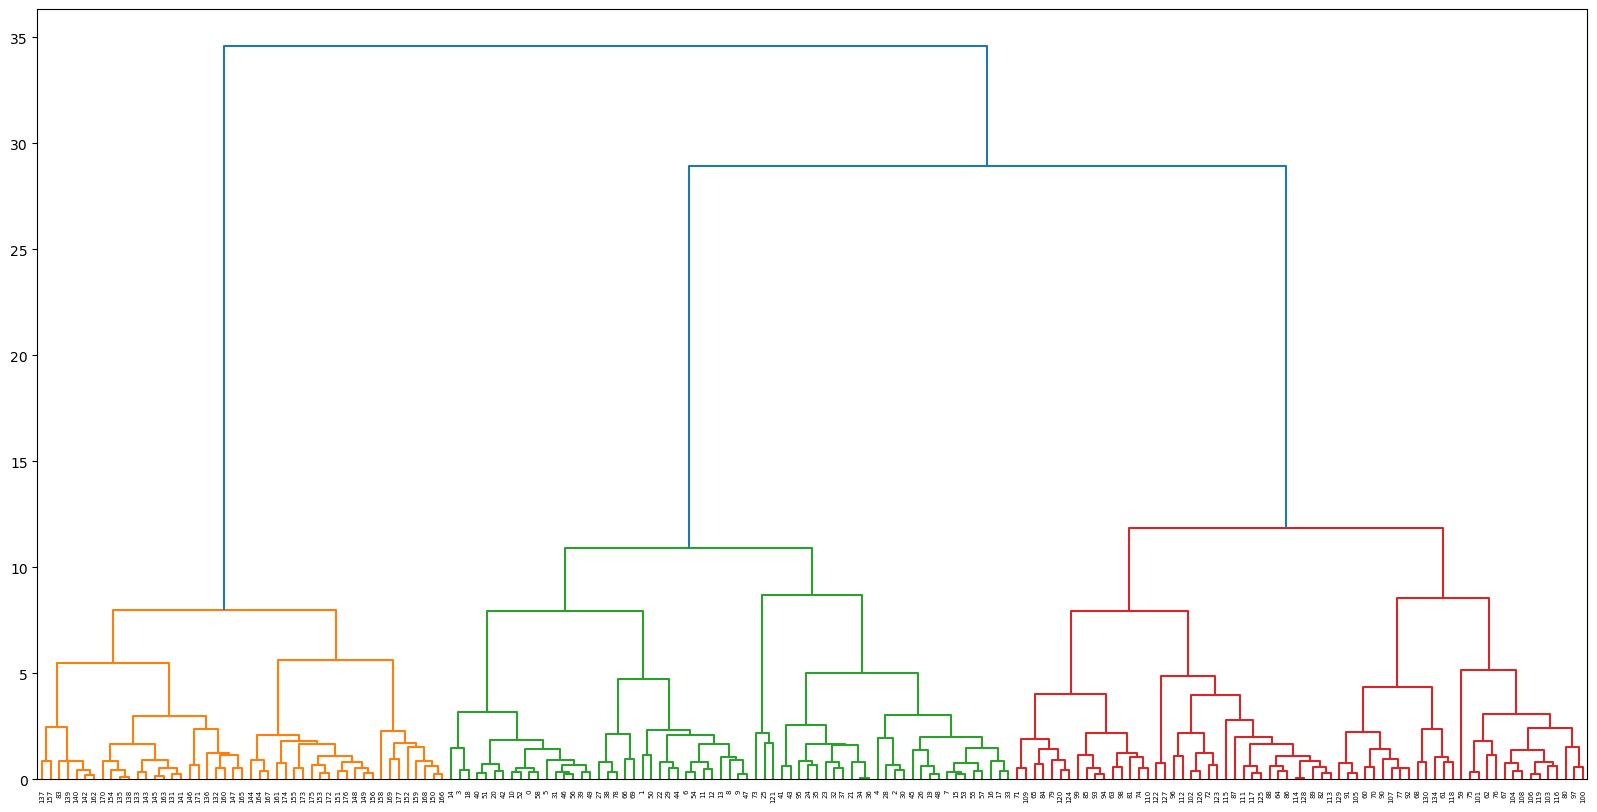

In [64]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(wine_stand_pca,method="ward"))

In [65]:
linkage=["single","complete","average","ward"]
for i in range(2,6):
  for x in linkage:
    hc=AgglomerativeClustering(n_clusters=i,linkage=x)
    y_hc=hc.fit_predict(wine_stand_pca)
    sil_score=sil(wine_stand_pca,y_hc)
    print('For n=',i,'and linkage =', x, 'Silhouette score is', np.round(sil_score,4))

For n= 2 and linkage = single Silhouette score is 0.3631
For n= 2 and linkage = complete Silhouette score is 0.3255
For n= 2 and linkage = average Silhouette score is 0.3631
For n= 2 and linkage = ward Silhouette score is 0.3951
For n= 3 and linkage = single Silhouette score is 0.2166
For n= 3 and linkage = complete Silhouette score is 0.2875
For n= 3 and linkage = average Silhouette score is 0.3867
For n= 3 and linkage = ward Silhouette score is 0.4459
For n= 4 and linkage = single Silhouette score is 0.1362
For n= 4 and linkage = complete Silhouette score is 0.3578
For n= 4 and linkage = average Silhouette score is 0.3217
For n= 4 and linkage = ward Silhouette score is 0.382
For n= 5 and linkage = single Silhouette score is 0.1114
For n= 5 and linkage = complete Silhouette score is 0.3558
For n= 5 and linkage = average Silhouette score is 0.4465
For n= 5 and linkage = ward Silhouette score is 0.3195


In [66]:
# create clusters with ward linkage and n_clusters = 3
hc=AgglomerativeClustering(n_clusters=3,linkage="ward",affinity="euclidean")
y_hc=hc.fit_predict(wine_stand_pca)
wine_og["cluster_id"]=y_hc
wine_og[["Type","cluster_id"]]

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Type,cluster_id
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
173,3,1
174,3,1
175,3,1
176,3,1


In [67]:
wine_og.groupby("cluster_id").agg(["mean"])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster_id,,,,,,,,,,,,,,
0,2.030303,12.264242,1.932121,2.245455,20.087879,91.666667,2.220152,1.991364,0.367727,1.540455,3.036364,1.042515,2.729848,504.439394
1,2.978723,13.171489,3.431702,2.441064,21.595745,98.829787,1.674894,0.792979,0.452766,1.165957,7.452553,0.682979,1.702553,627.021277
2,1.092308,13.624769,1.954769,2.435538,17.373846,108.600000,2.819692,2.961692,0.290154,1.949385,5.379538,1.069538,3.149077,1079.753846


In [68]:
wine_og.groupby("Type").agg(["mean"])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster_id
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,2.000000
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,0.183099
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.958333


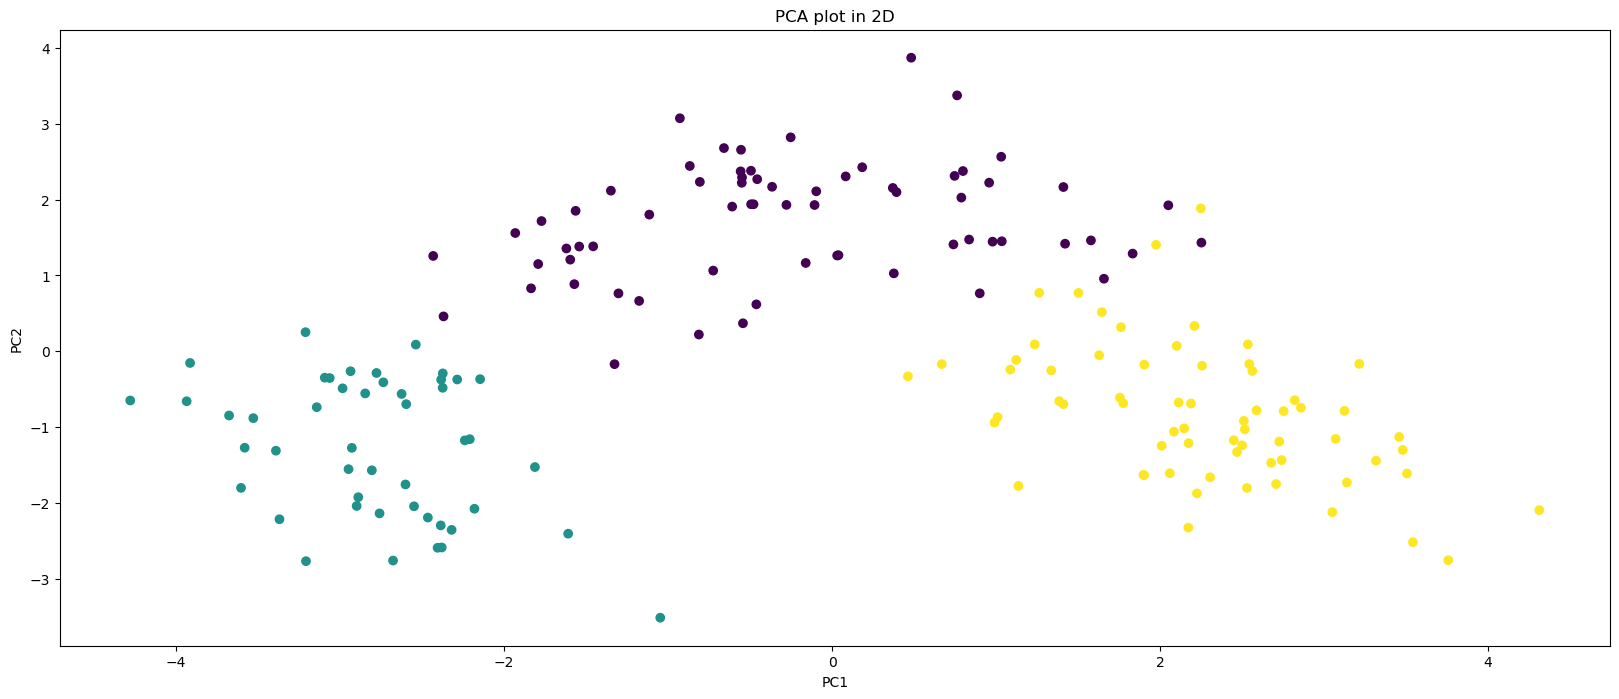

In [69]:
plt.figure(figsize=(20,8))
plt.scatter(wine_stand_pca.iloc[:,0] , wine_stand_pca.iloc[:,1], c=wine_og.cluster_id)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [70]:
#In K Means clustering, whether be it a normalised data or standardised data with first 3 principal components, We get optimum number of clusters equal to 3 which is same as no. of clusters in original data.

In [71]:
#KMeans clustering
#for normalized pca data
#elbow method to determine the clusters
wcss=[]
for i in range(2,7):
  kmeans=KMeans(n_clusters=i,random_state=0) 
  kmeans.fit(wine_norm_pca)
  wcss.append(kmeans.inertia_)
wcss

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

[34.29463958796954,
 18.938260830466422,
 15.666001148083431,
 13.485591049749877,
 11.515332566227977]

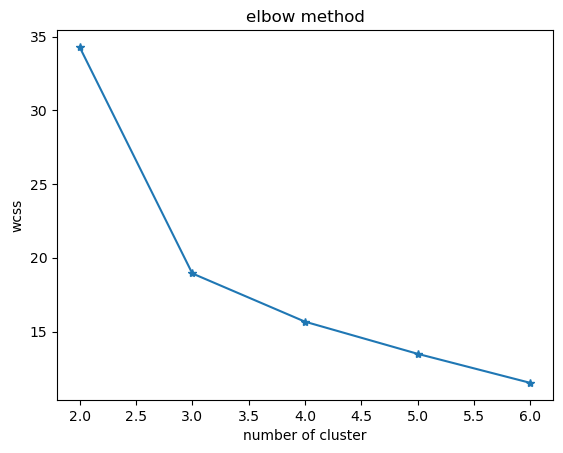

In [72]:
plt.plot(range(2,7),wcss,marker="*")
plt.title("elbow method")
plt.xlabel("number of cluster")
plt.ylabel("wcss")
plt.show()

In [73]:
clear elbow is visible at n=3 .But still lets verify this with help of silhouette score.

In [74]:
for i in range(2,7):
  kmeans=KMeans(n_clusters=i,random_state=3)
  kmeans.fit(wine_norm_pca)
  sil_score=sil(wine_norm_pca,kmeans.labels_)
  print('For cluster =', i , 'The silhouette score is', sil_score) 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For cluster = 2 The silhouette score is 0.4323518936290524


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For cluster = 3 The silhouette score is 0.47796626568347655


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For cluster = 4 The silhouette score is 0.4347348309376316


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For cluster = 5 The silhouette score is 0.4016910141300239


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For cluster = 6 The silhouette score is 0.36777497060150005


In [75]:
#Silhouette score is maximum (0.4779) for n_clusters = 3
cluster=KMeans(n_clusters=3,random_state=3)
cluster.fit(wine_norm_pca)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=3)

In [76]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [77]:
wine_og['cluster_id']=cluster.labels_
wine_og[['Type','cluster_id']]

,Type,cluster_id
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
173,3,0
174,3,0
175,3,0
176,3,0


In [78]:
wine_og.groupby("cluster_id").agg(["mean"])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster_id,,,,,,,,,,,,,,
0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,1.092308,13.656923,1.946154,2.437692,17.441538,106.584615,2.864615,2.970000,0.284308,1.923846,5.361692,1.071385,3.148923,1080.107692
2,2.000000,12.202742,1.946774,2.249839,20.211290,93.451613,2.200806,2.038710,0.369032,1.607903,2.949355,1.056387,2.801129,502.709677


In [79]:
wine_og.groupby("Type").agg(["mean"])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster_id
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,1.000000
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,1.830986
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.000000


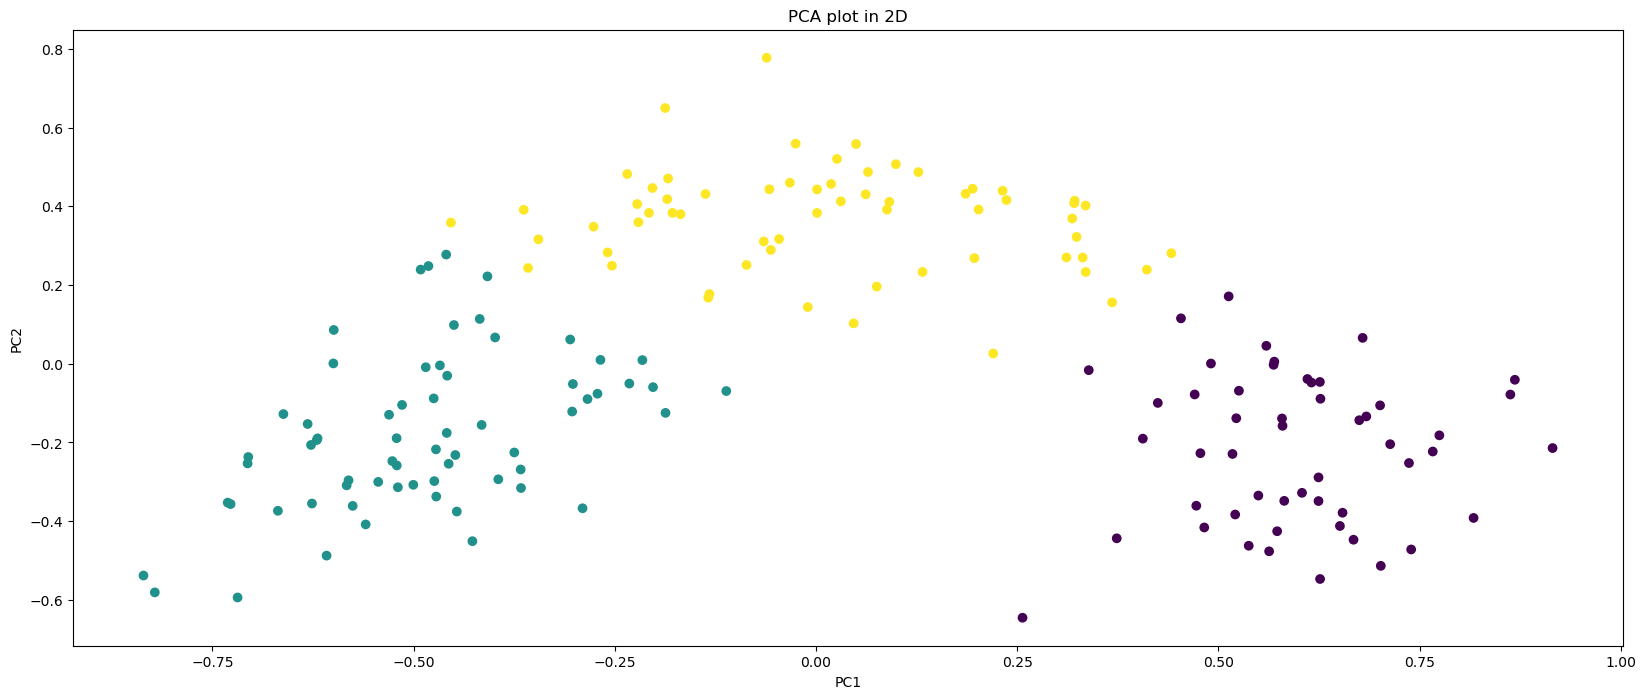

In [80]:
plt.figure(figsize=(20,8))
plt.scatter(wine_norm_pca.iloc[:,0] ,wine_norm_pca.iloc[:,1], c=wine_og.cluster_id)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [81]:
# Kmeans clustering standardized pca

In [82]:
wcss = []

for i in range (2, 7):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(wine_stand_pca)
    wcss.append(kmeans.inertia_) 
wcss 


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

[886.1611364823486,
 512.999506766151,
 429.8030732473645,
 371.0239444945666,
 326.2768904959654]

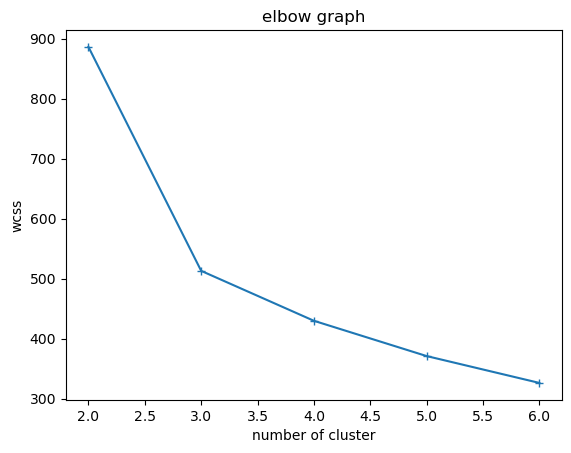

In [83]:
#elbow graph to find find best k value
plt.plot(range(2,7),wcss,marker="+")
plt.title("elbow graph")
plt.xlabel("number of cluster")
plt.ylabel("wcss")
plt.show()

In [84]:
for i in range (2,7):
        clusters = KMeans(n_clusters=i, random_state= 1)
        clusters.fit(wine_stand_pca) 
        sil_score =sil(wine_stand_pca , clusters.labels_ )
        print('For cluster =', i , 'The silhouette score is', sil_score) 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For cluster = 2 The silhouette score is 0.38938813089003327


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For cluster = 3 The silhouette score is 0.4532351215683952


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For cluster = 4 The silhouette score is 0.41067803094609245


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For cluster = 5 The silhouette score is 0.36776863492152734


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For cluster = 6 The silhouette score is 0.30778398336863594


In [85]:
#Silhouette score is maximum (0.4532) for n_clusters = 3
cluster=KMeans(n_clusters=3,random_state=0)
cluster.fit(wine_stand_pca)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [86]:
cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [87]:
wine_og["cluster_id"]=cluster.labels_
wine_og[["Type","cluster_id"]]

,Type,cluster_id
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
173,3,0
174,3,0
175,3,0
176,3,0


In [88]:
wine_og.groupby("cluster_id").agg(["mean"])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster_id,,,,,,,,,,,,,,
0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,2.000000,12.249062,1.910313,2.233281,20.087500,92.812500,2.227813,2.023438,0.359531,1.619063,2.949219,1.063063,2.803906,507.828125
2,1.063492,13.656032,1.983175,2.460476,17.479365,107.650794,2.858254,3.015079,0.291270,1.922540,5.438413,1.065079,3.157143,1093.238095


In [89]:
wine_og.groupby("Type").agg(["mean"])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster_id
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,2.000000
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,1.014085
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.000000


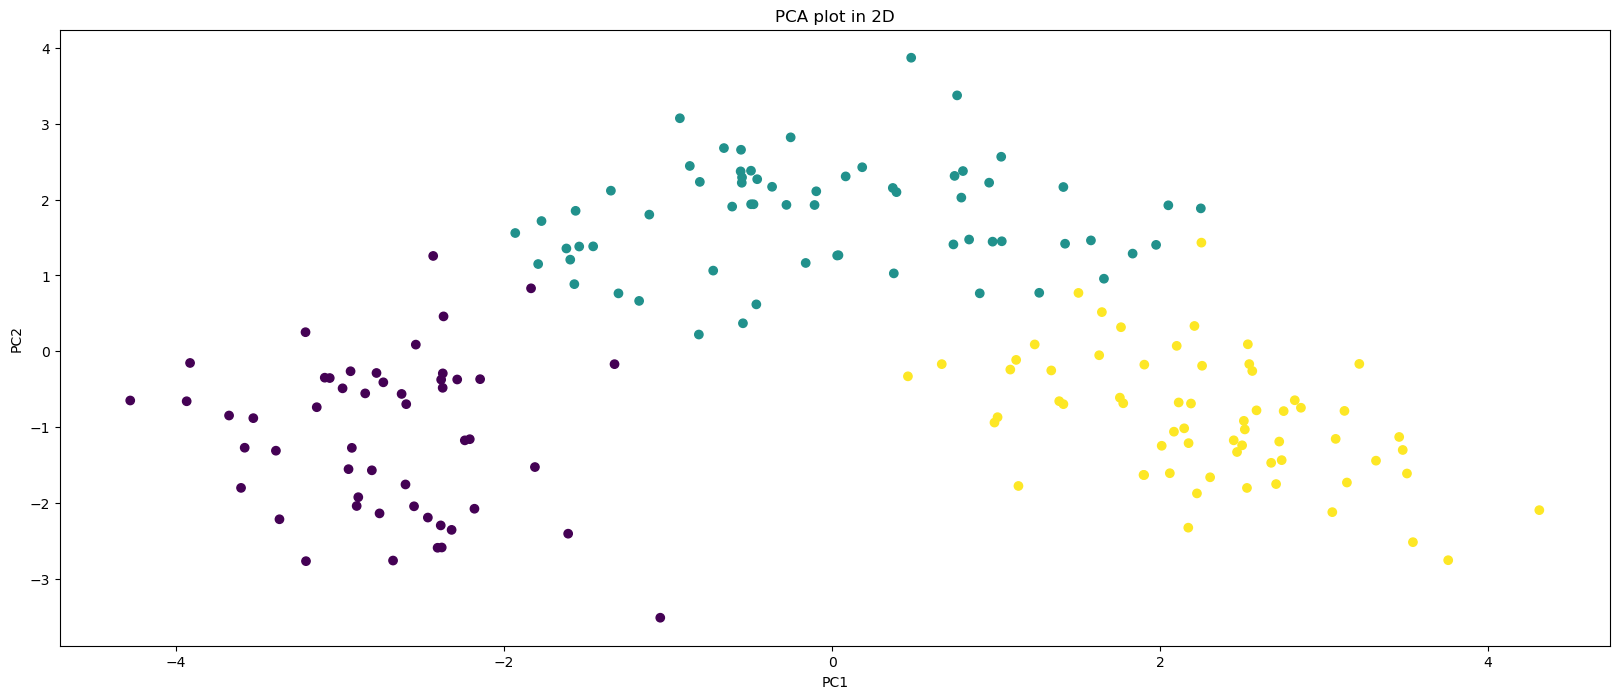

In [90]:
plt.figure(figsize=(20,8))
plt.scatter(wine_stand_pca.iloc[:,0] ,wine_stand_pca.iloc[:,1], c=wine_og.cluster_id)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [91]:
#In K Means clustering, whether be it a normalised data or standardised data with first 3 principal components, We get optimum number of clusters equal to 3 which is same as no. of clusters in original data.

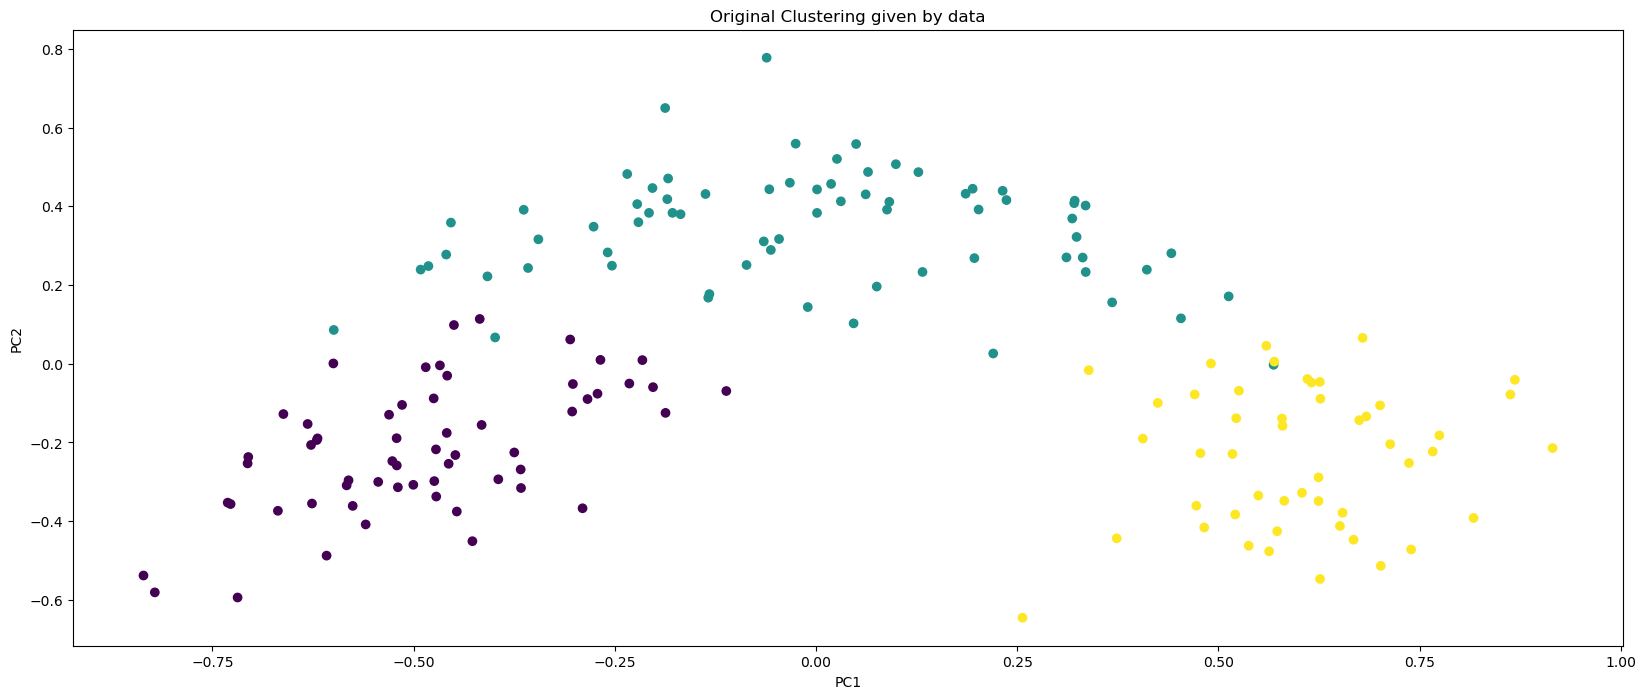

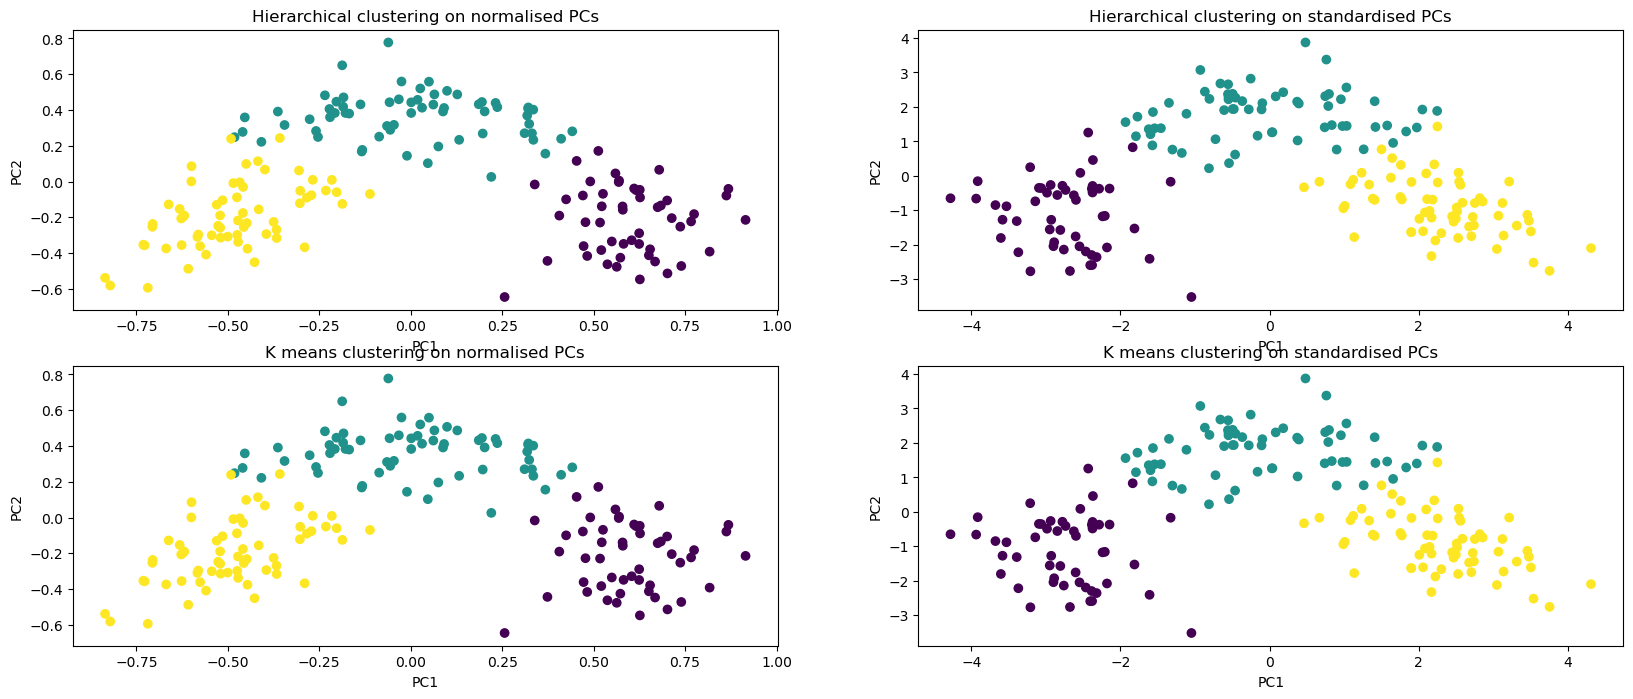

In [92]:
#Lets visualise original clustering and clusterings made by hierarchical and k means methods
plt.figure(figsize=(20,8))
plt.scatter(wine_norm_pca.iloc[:,0] , wine_norm_pca.iloc[:,1], c=wine_og.Type)
plt.title('Original Clustering given by data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
plt.scatter(wine_norm_pca.iloc[:,0] , wine_norm_pca.iloc[:,1], c=wine_og.cluster_id)
plt.title('Hierarchical clustering on normalised PCs')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(2,2,2)
plt.scatter(wine_stand_pca.iloc[:,0] , wine_stand_pca.iloc[:,1], c=wine_og.cluster_id)
plt.title('Hierarchical clustering on standardised PCs')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(2,2,3)
plt.scatter(wine_norm_pca.iloc[:,0] ,wine_norm_pca.iloc[:,1], c=wine_og.cluster_id)
plt.title('K means clustering on normalised PCs')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(2,2,4)
plt.scatter(wine_stand_pca.iloc[:,0] ,wine_stand_pca.iloc[:,1], c=wine_og.cluster_id)
plt.title('K means clustering on standardised PCs')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()